<a href="https://colab.research.google.com/github/mugalan/vibration-analysis/blob/main/assignments/ME421_Assignement_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ME320 - FEBRUARY 2023 - Examination Rubric

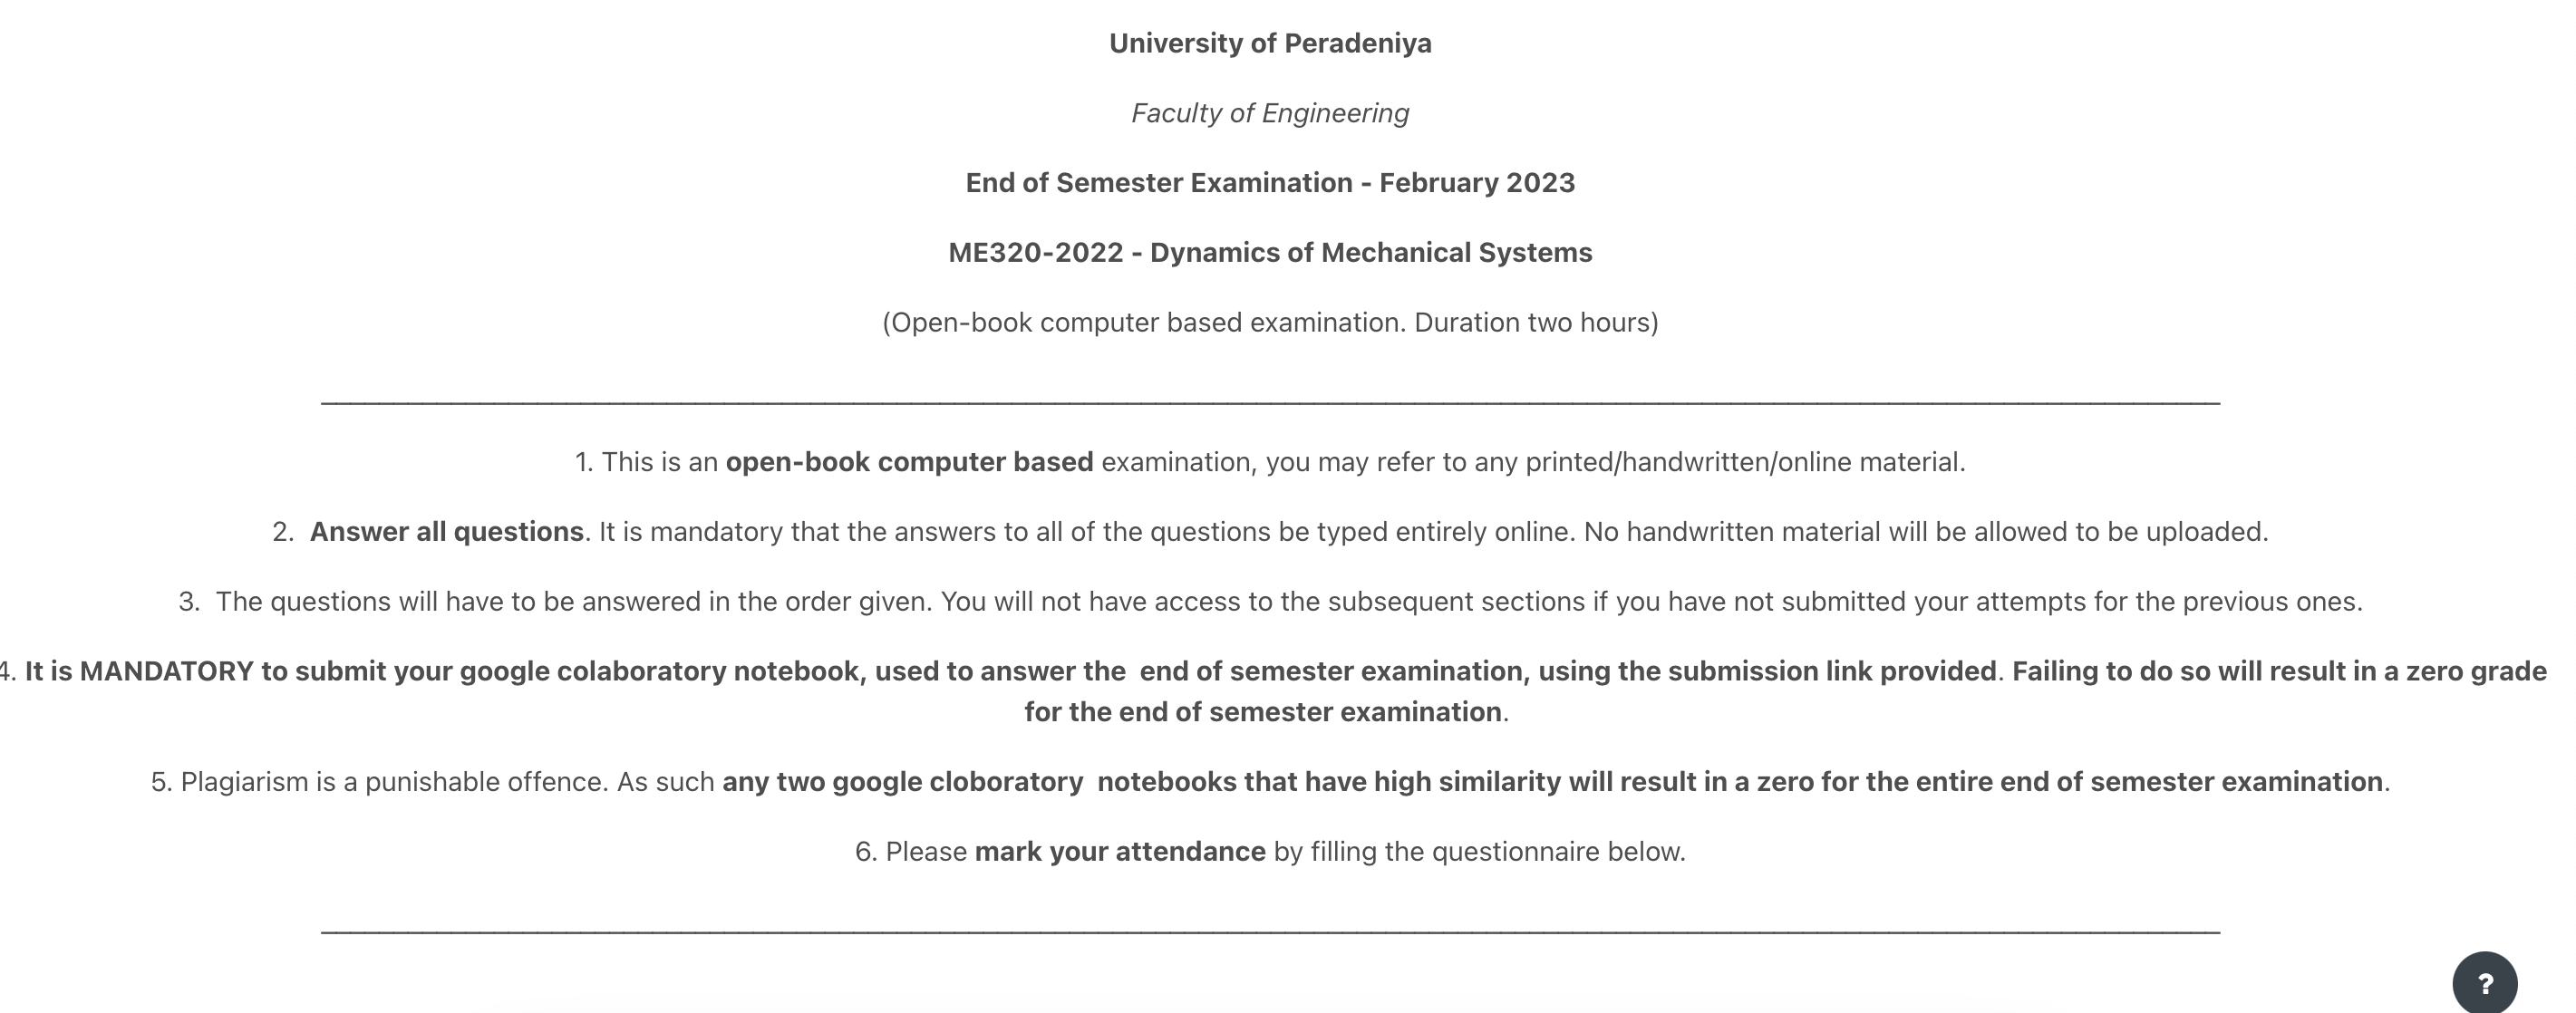

# ME320 - FEBRUARY 2023 - End of Semester Sample Answers


# Setting Up

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go

import sympy as sym
from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [ ]:
class mugas_vibration_functions:
  
    def __init__(self): 
        self=[];

    def dynamicSystemModel(self, X, t, A, B, cParameters):
        dXdt=A @ X + B @ self.controlFn(t, cParameters);
        self.X=X;
        return dXdt

    def controlFn(self, t, cParameters):
        return cParameters[0]*np.cos(cParameters[1] * t)

    def simulateDySystem(self, Tmax, dT, X0, A,B, cParameters, xLabel, yLabel):
        t = np.linspace(0, Tmax, int(Tmax/dT+1))
        sol = odeint(self.dynamicSystemModel, X0, t, args=(A, B, cParameters));
        self.soln=sol;
        fig = go.Figure()
        [nt,nS]=sol.shape;

        # Add traces
        for nn in range(nS):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
            fig.update_layout(xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
        
        fig.show()
        return [t,sol,fig] 
    
    def animate_particle_motion(self, XX, axisRange, figTitle):
        xx=[jj[0] for jj in XX]
        yy=[jj[1] for jj in XX]
        zz=[jj[2] for jj in XX]

        fig = go.Figure(
            data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                            mode="markers",
                            marker=dict(color="red", size=10)),
                go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                            mode="lines",
                            line=dict(color="blue", width=2))],
            layout=go.Layout(
                scene = dict(
                            xaxis=dict(range=axisRange[0], autorange=False),
                            yaxis=dict(range=axisRange[1], autorange=False),
                            zaxis=dict(range=axisRange[2], autorange=False),
                            aspectratio=dict(x=1, y=1, z=1),
                ),
                title_text=figTitle, hovermode="closest",
                updatemenus=[dict(type="buttons",
                                buttons=[dict(label="Play",
                                                method="animate",
                                                args=[None])])]),
            frames=[go.Frame(
                data=[go.Scatter3d(
                    x=[p[0]],
                    y=[p[1]],
                    z=[p[2]],
                    name='Particle',
                    mode="markers",
                    marker=dict(color="red", size=10))])

                for p in XX]
        )

        fig.show()
        return fig

    def animate_2D_scatter_plot(self, x, YY, xlabel, ylabel, title):
        fig = go.Figure(data=[go.Scatter(x=x,y=YY[0,:])],
                layout=go.Layout(
                    xaxis={'title':xlabel},
                    yaxis={'title':ylabel,'range':[1.1*YY.min(),1.1*YY.max()]},
                    title={'text':title,'y':0.9,'x':0.5, 'xanchor': 'center','yanchor': 'top'},
                    scene = dict(aspectratio=dict(x=1, y=1)),    
                    hovermode="closest",
                    updatemenus=[dict(type="buttons",
                                    buttons=[dict(label="Play",
                                                    method="animate",
                                                    args=[None])])]
                    ),
            frames=[go.Frame(data=[go.Scatter(x=x,y=y)]) for y in YY]
        )

        #fig.show()
        return fig

In [ ]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def Q3simu(X_0, Parem, dT, tsampl):
    X_n = X_0
    X_n = np.array(X_n)
    X_n = np.t
    #for i in range(tsampl):


  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None, {"frame": {"duration": 10},"mode": "immediate","fromcurrent": True, "transition": {"duration": 10, "easing": "linear"},}]
                                            )])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [ ]:
mgVF=mugas_vibration_functions()

In [ ]:
mgDS=mugas_dynamic_systems_simulation_functions()

#Section A -- 50% of total marks - 100% Allocated to ILO4

##Q1 - Damped natural frequency of a 1-DOF SMD - 2.5/50 marks

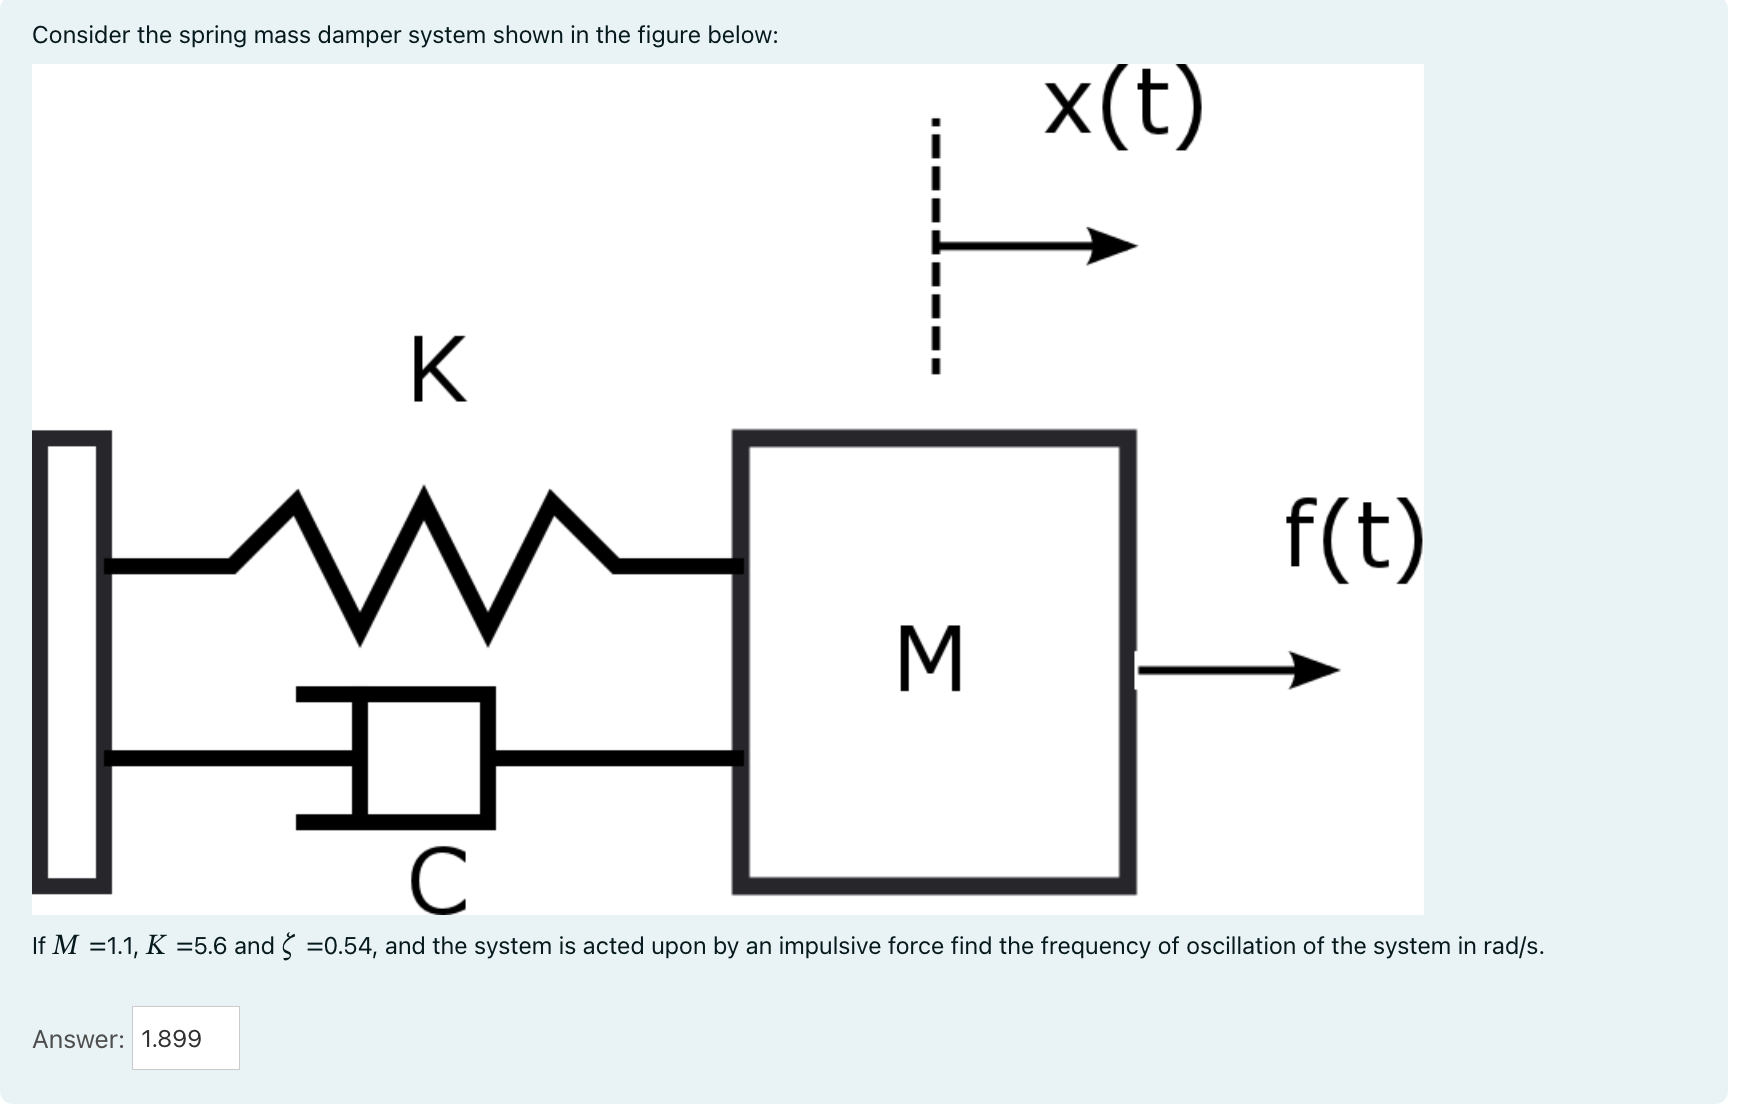

$\omega_d=\omega_n\sqrt{1-\zeta^2}$

In [ ]:
K=5.6; M=1.1; zeta=0.54;
wn=sqrt(K/M); 
wd=wn*sqrt(1-zeta**2);

In [ ]:
wd

##Q2 - Resonance Amplitude of a 1-DOF SMD - 2.5/50 marks 

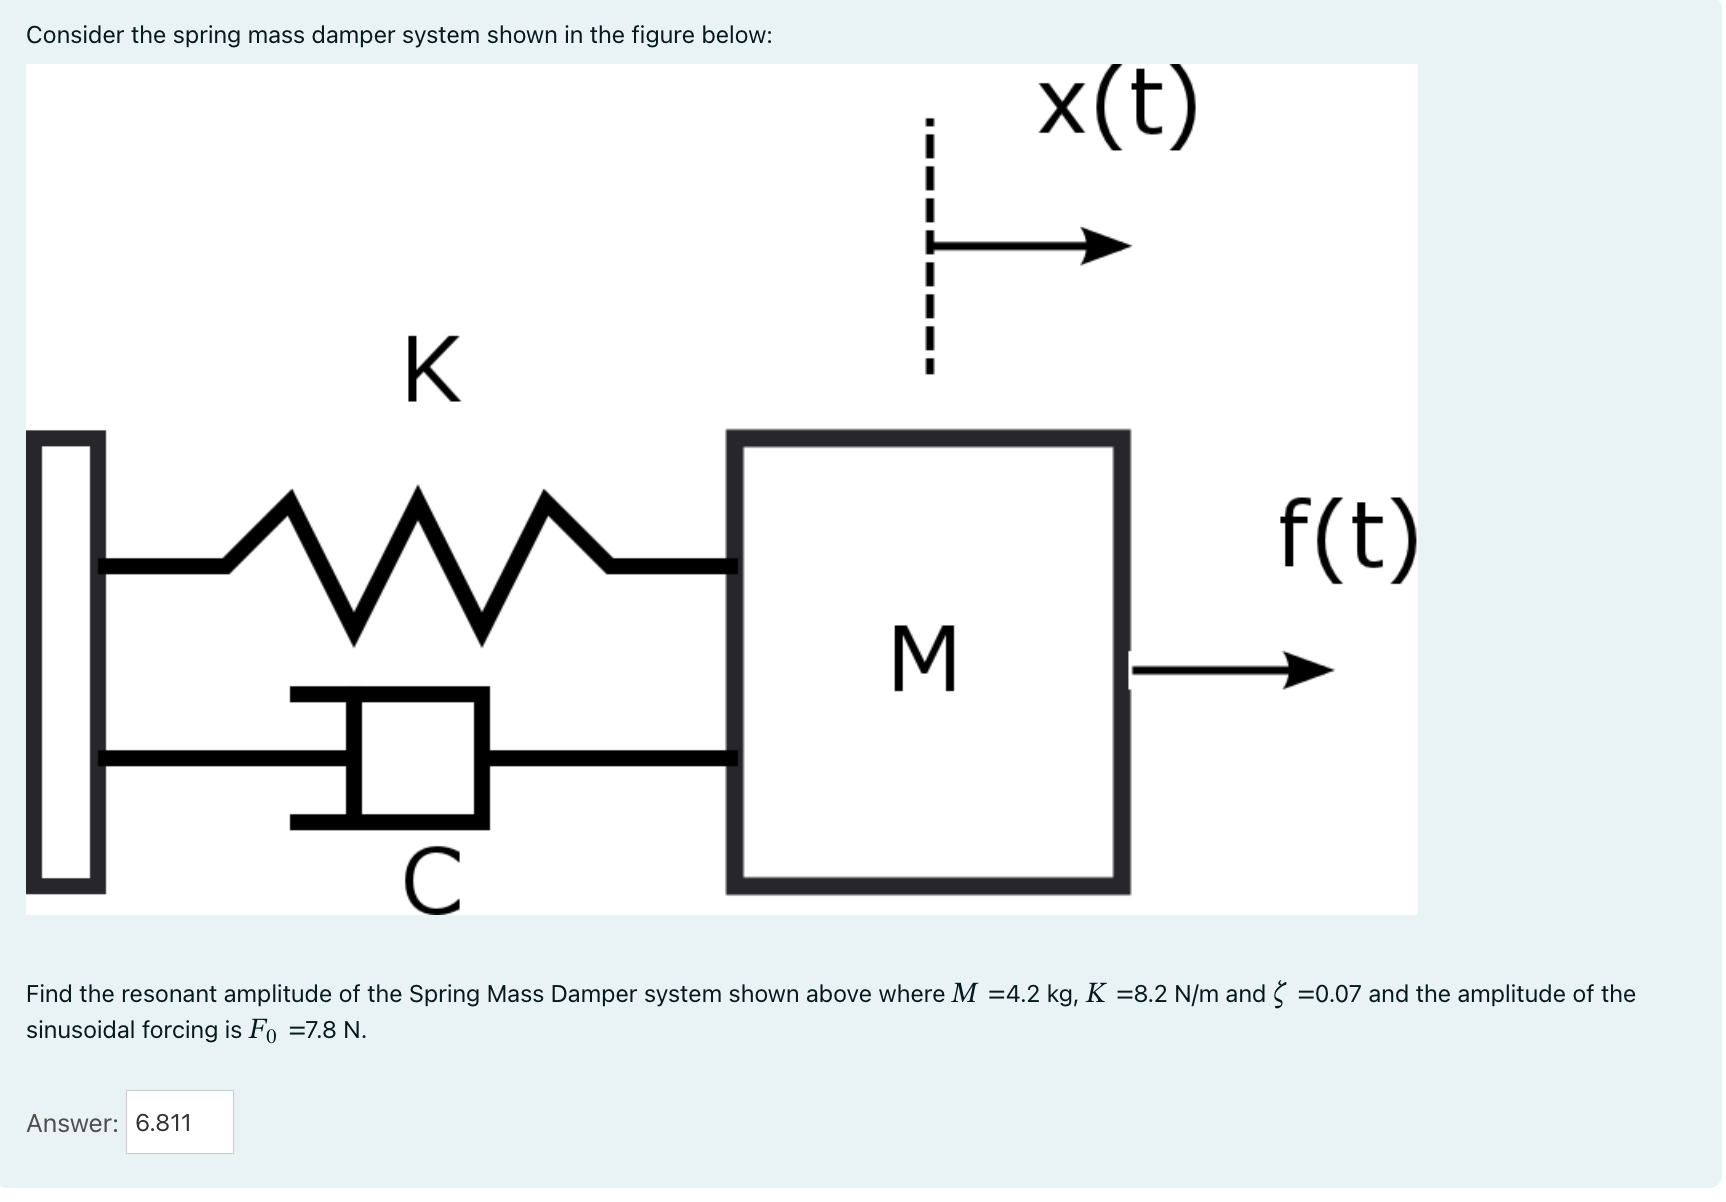

\begin{align}
{x_{ss}}_{max}=\frac{F_0/M}{2\zeta\omega_n^2\sqrt{1-\zeta^2}}.
\end{align}

In [ ]:
K=8.2; M=4.2; zeta=0.07; F_0=7.8;
wn=sqrt(K/M); 
xssmax=(F_0/M)/(2*zeta*wn**2*sqrt(1-zeta**2))

In [ ]:
xssmax

## Q3- Modeling the Vehicle Suspension System -- 7.5/50 marks

Consider the small amplitude approximation of a vehicle suspension system shown below:

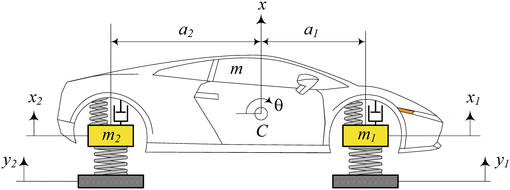

\begin{align}
m_1\ddot{y}_1&=-k_{t}y_1+k_{s}(x-a_1\theta-y_1)+c_{s}(\dot{x}-a_1\dot{\theta}-\dot{y}_1)\\
m_2\ddot{y}_2&=-k_{t}y_2+k_{s}(x+a_2\theta-y_2)+c_{s}(\dot{x}+a_2\dot{\theta}-\dot{y}_2)\\
m\ddot{x}&=-k_{s}(x+a_2\theta-y_2)-c_{s}(\dot{x}+a_2\dot{\theta}-\dot{y}_2)+-k_{s}(x-a_1\theta-y_1)-c_{s}(\dot{x}-a_1\dot{\theta}-\dot{y}_1)+f(t)\\
I\ddot{\theta}&=-a_2(k_{s}(x+a_2\theta-y_2)+c_{s}(\dot{x}+a_2\dot{\theta}-\dot{y}_2))+a_1(k_{s}(x-a_1\theta-y_1)+c_{s}(\dot{x}-a_1\dot{\theta}-\dot{y}_1))+T(t)
\end{align}

**Only the third equation above needs to be derived for the answer**

##Q4 - Concept Checking Question - 5/50 marks

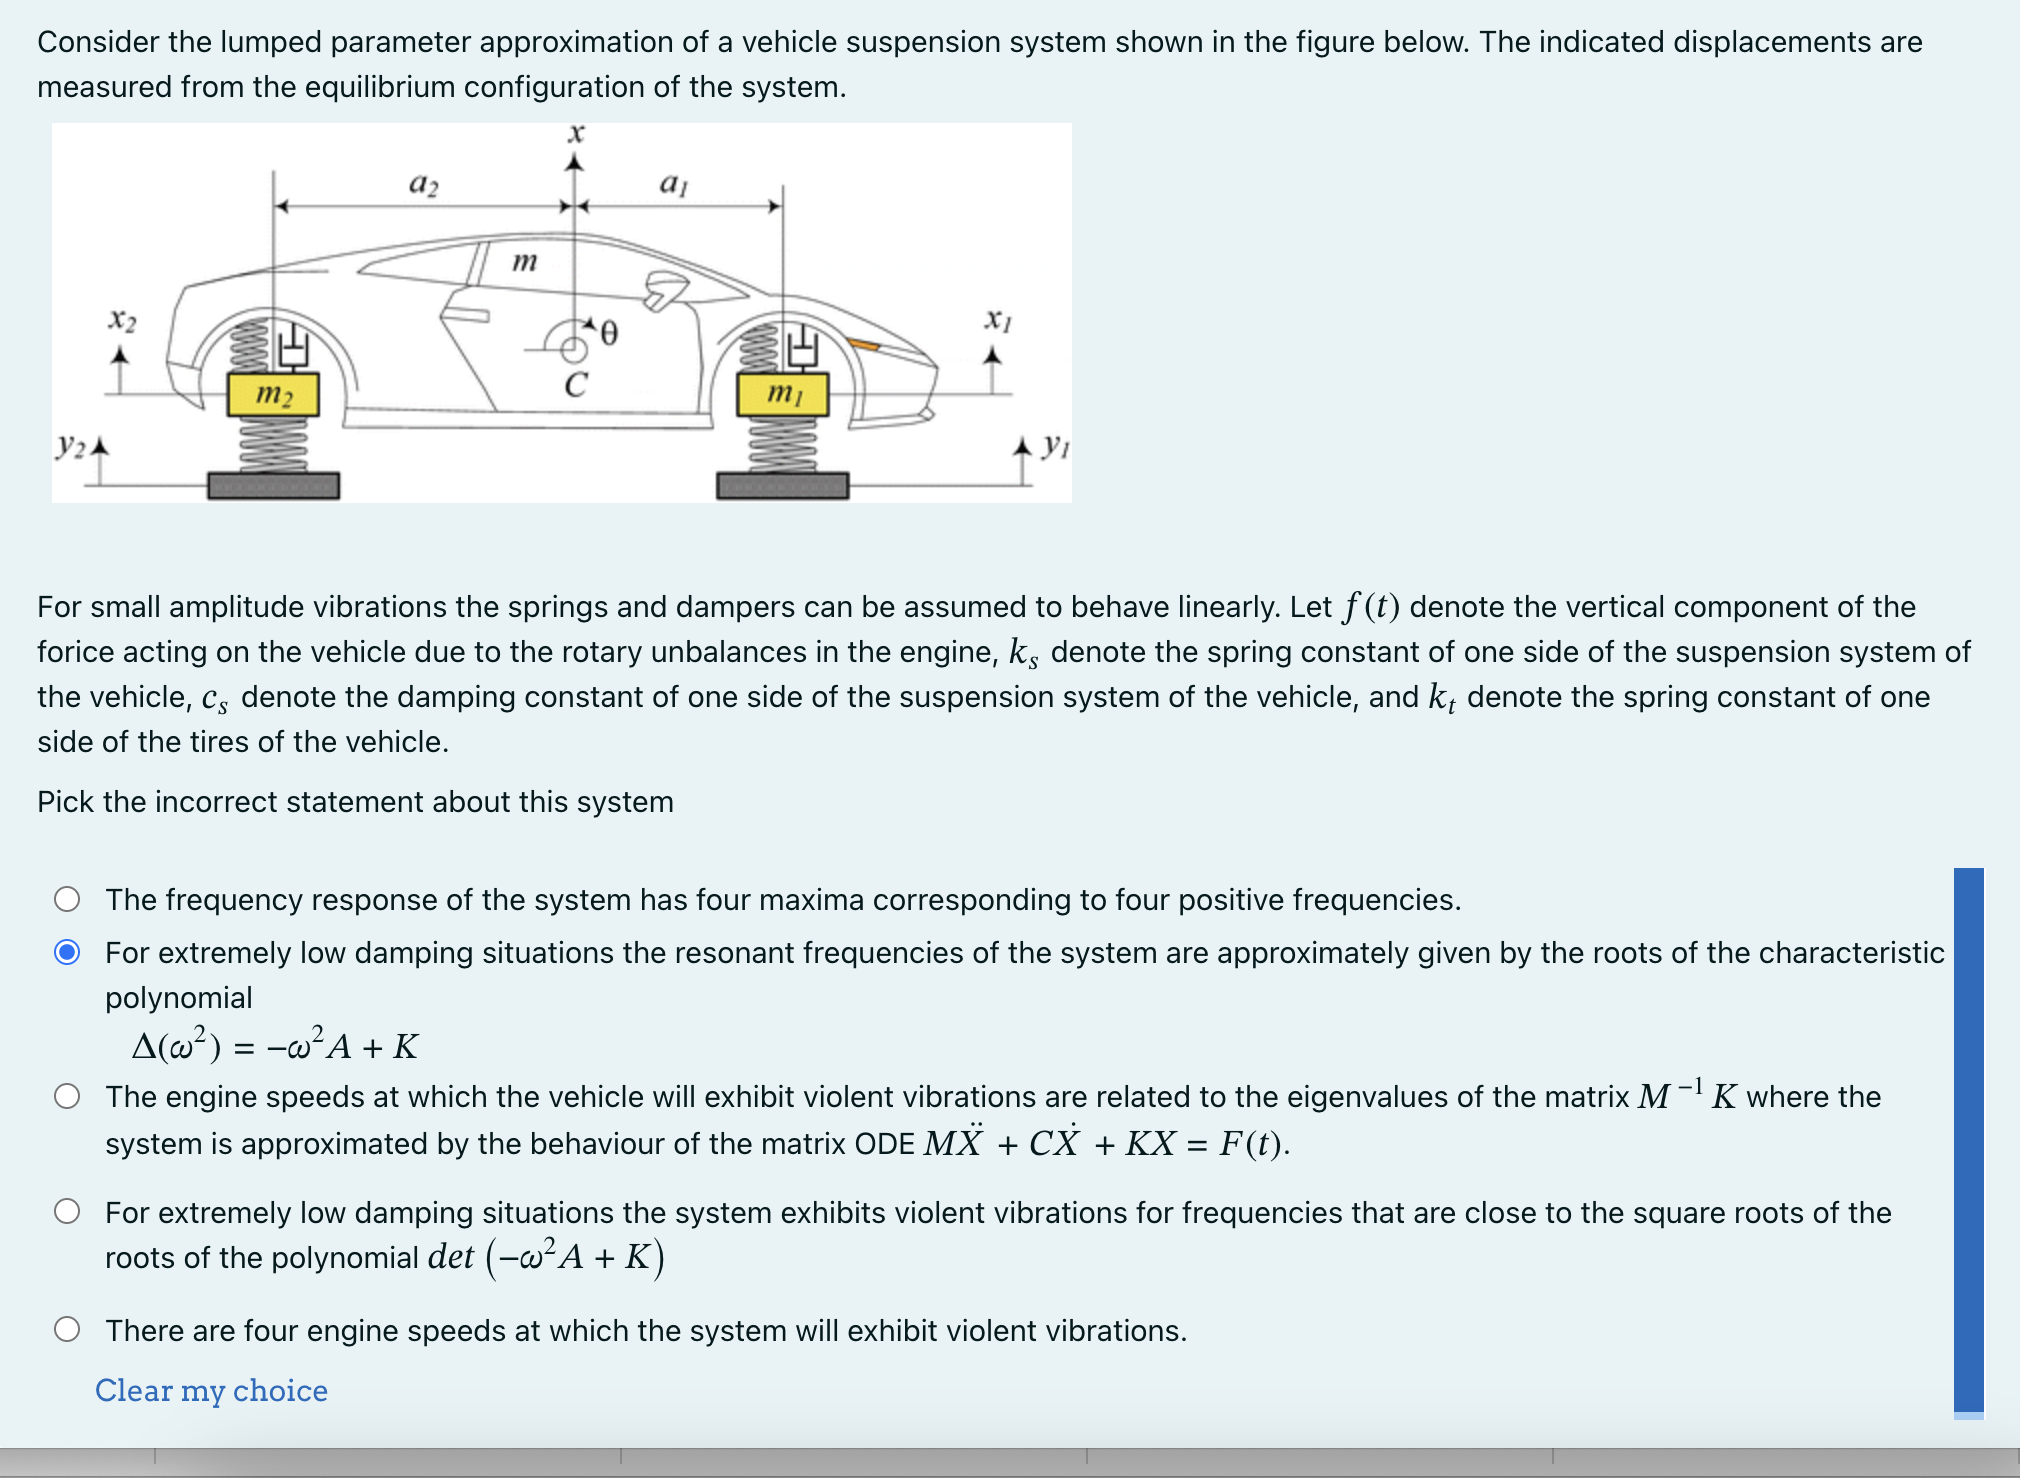

##Q5, Q6 - Resonance frequencies -- 15/50 marks 

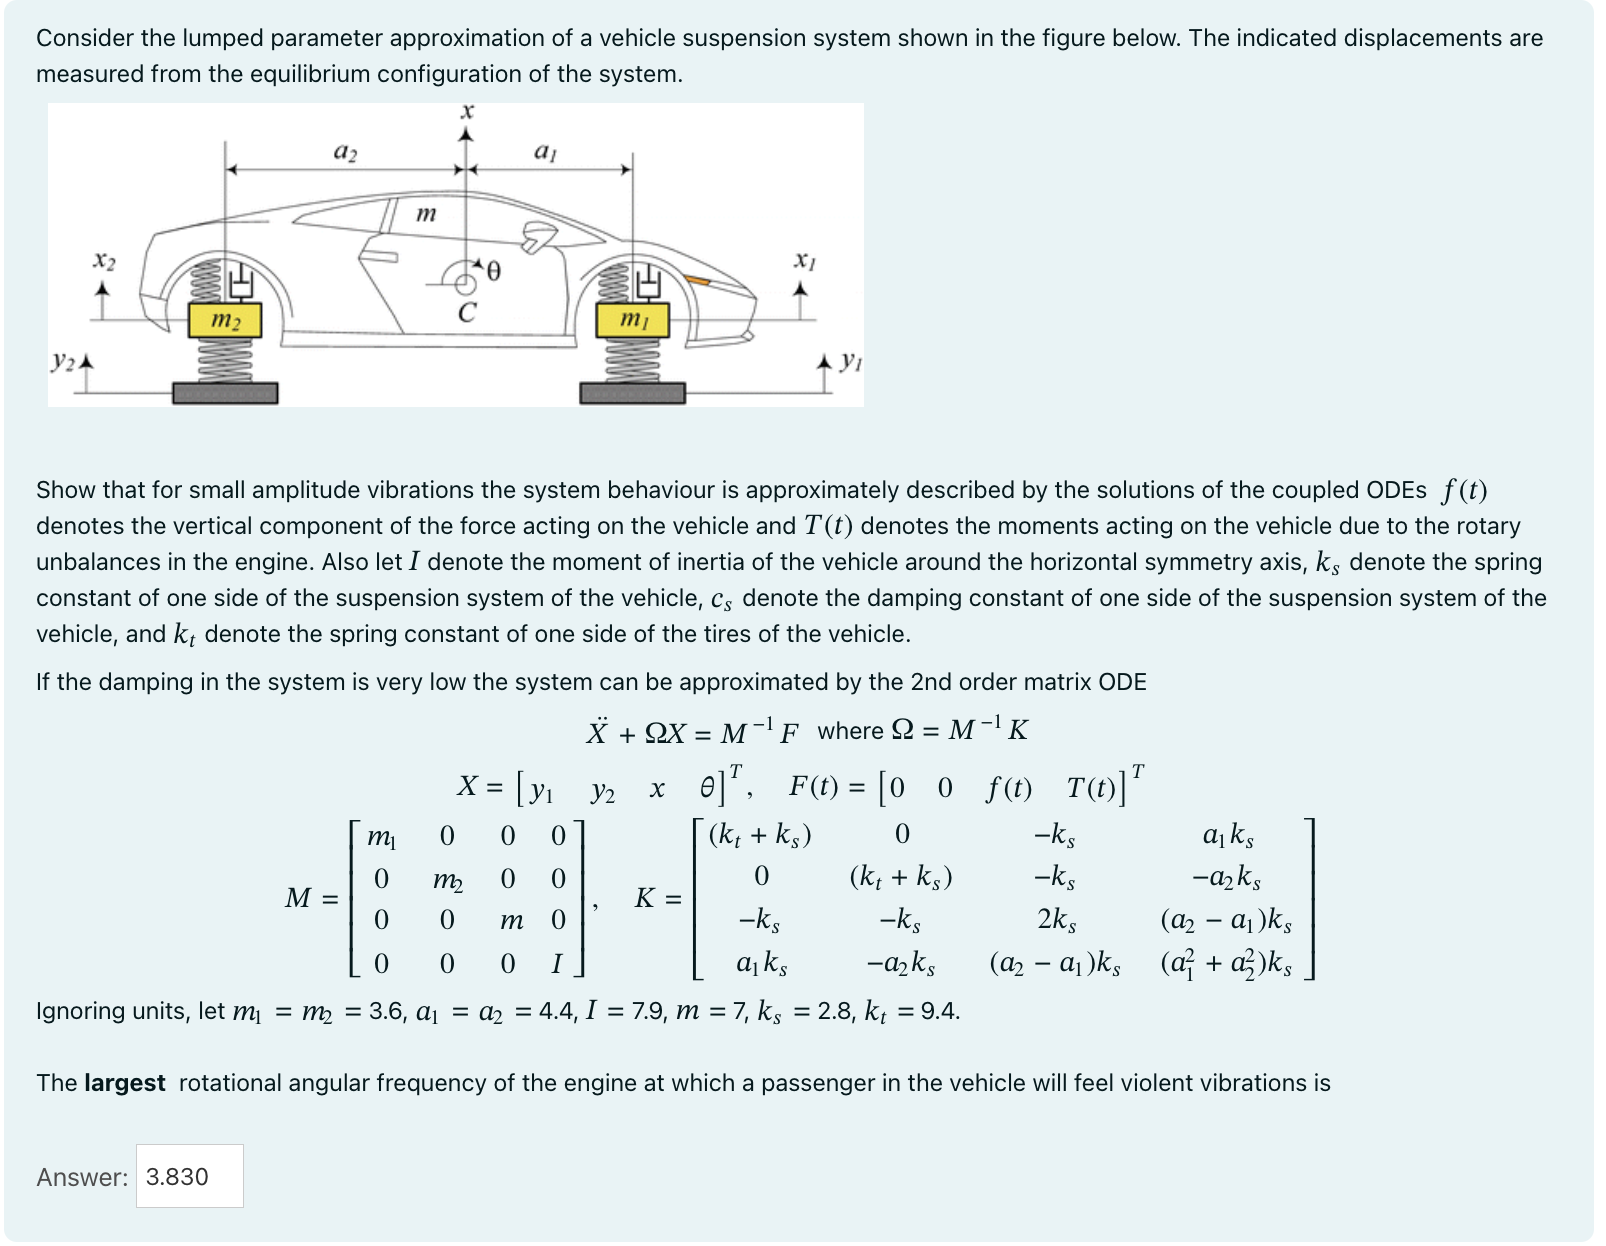

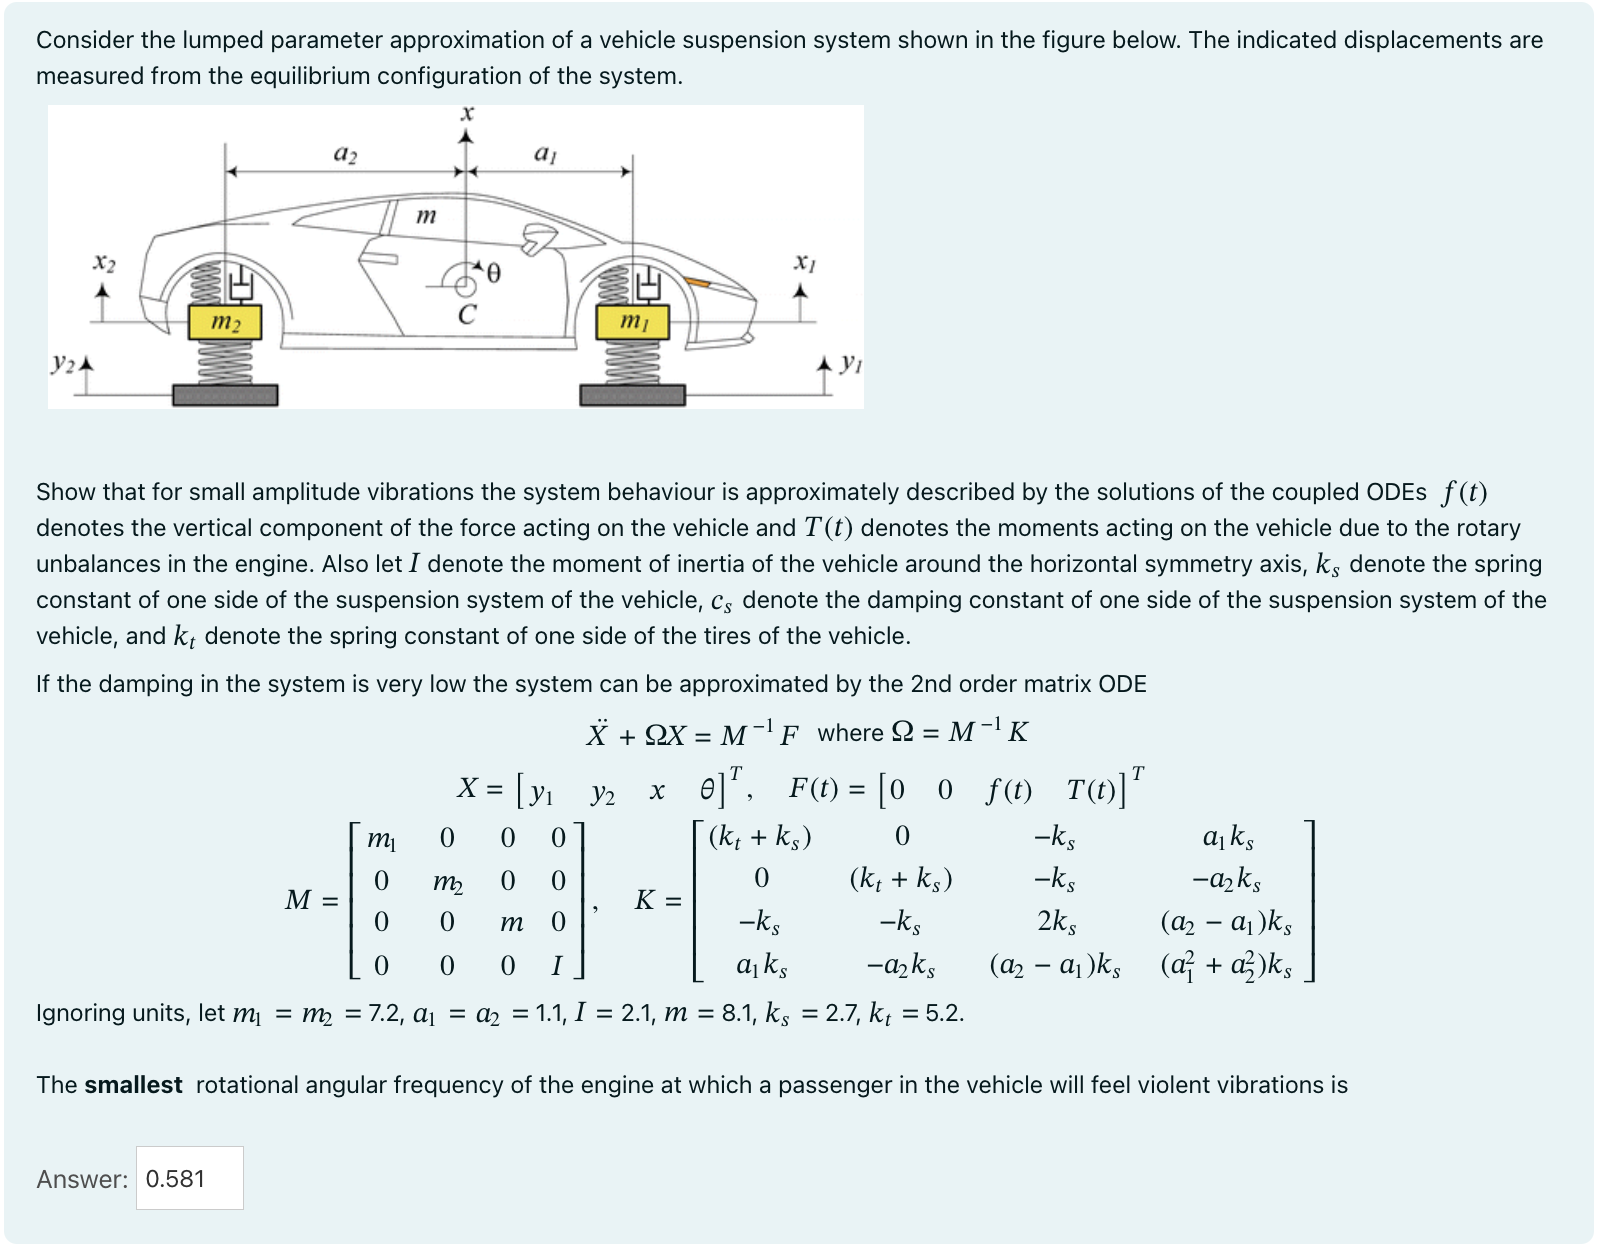

In [ ]:
m_0, a, m_1, m_2, k_t, k_s, c_s, m, I, a_1, a_2=symbols('m_0, a, m_1, m_2, k_t, k_s, c_s, m, I, a_1, a_2',real=True) 

In [ ]:
M=Matrix([[m_1,0,0,0],[0,m_2,0,0],[0,0,m,0],[0,0,0,I]])
K=Matrix([[k_t+k_s,0,-k_s,a_1*k_s],[0,k_t+k_s,-k_s,-a_2*k_s],[-k_s,-k_s,2*k_s,(a_2-a_1)*k_s],[a_1*k_s,-a_2*k_s,(a_2-a_1)*k_s,(a_1**2+a_2**2)*k_s]])
C=Matrix([[c_s,0,-c_s,a_1*c_s],[0,c_s,-c_s,-a_2*c_s],[-c_s,-c_s,2*c_s,(a_2-a_1)*c_s],[a_1*c_s,-a_2*c_s,(a_2-a_1)*c_s,(a_1**2+a_2**2)*c_s]])

In [ ]:
Omega=M.inv()@K

when $m_1=m_2=m_0$ and $a_1=a_2=a$ the resonance frequencies are given by

####Max frequency 7.5/50

In [ ]:
max(np.sqrt(np.array([*Omega.subs({m_1:m_0,m_2:m_0, a_1:a, a_2:a}).subs({m_0:3.6,a:4.4,k_s:2.8,k_t:9.4,I:7.9,m:7.0}).eigenvals()]).astype(float)))

####Min frequency 7.5/50

In [ ]:
min(np.sqrt(np.array([*Omega.subs({m_1:m_0,m_2:m_0, a_1:a, a_2:a}).subs({m_0:7.2,a:1.1,k_s:2.7,k_t:5.2,I:2.1,m:8.1}).eigenvals()]).astype(float)))

##Q7 - Forced vibration Frequency 5/50 marks

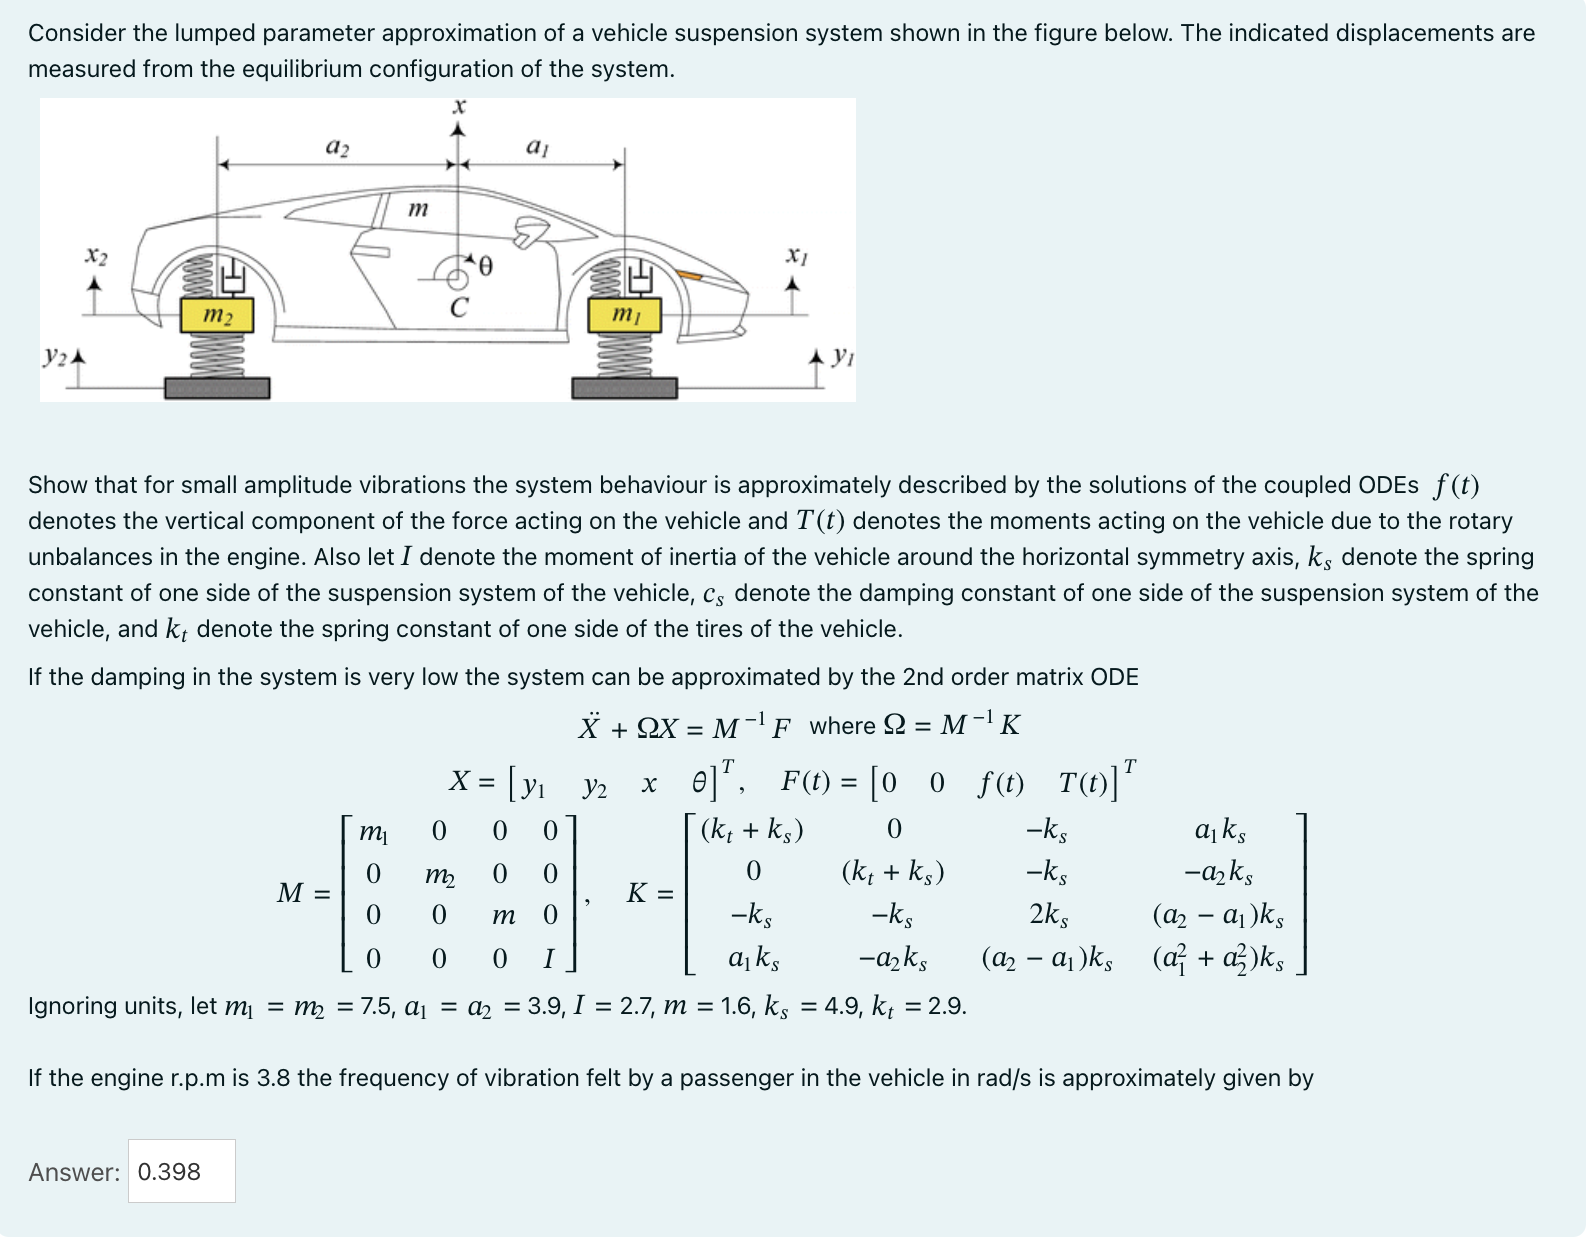

If the engine r.p.m is $N$ the frequency of vibration felt by a passenger in the vehicle in rad/s is approximately given by $2\pi N/60$ 

In [ ]:
N=3.8
omega=2*np.pi*N/60

In [ ]:
omega

##Q8 - Simulation of the system dynamics 12.5/50 marks

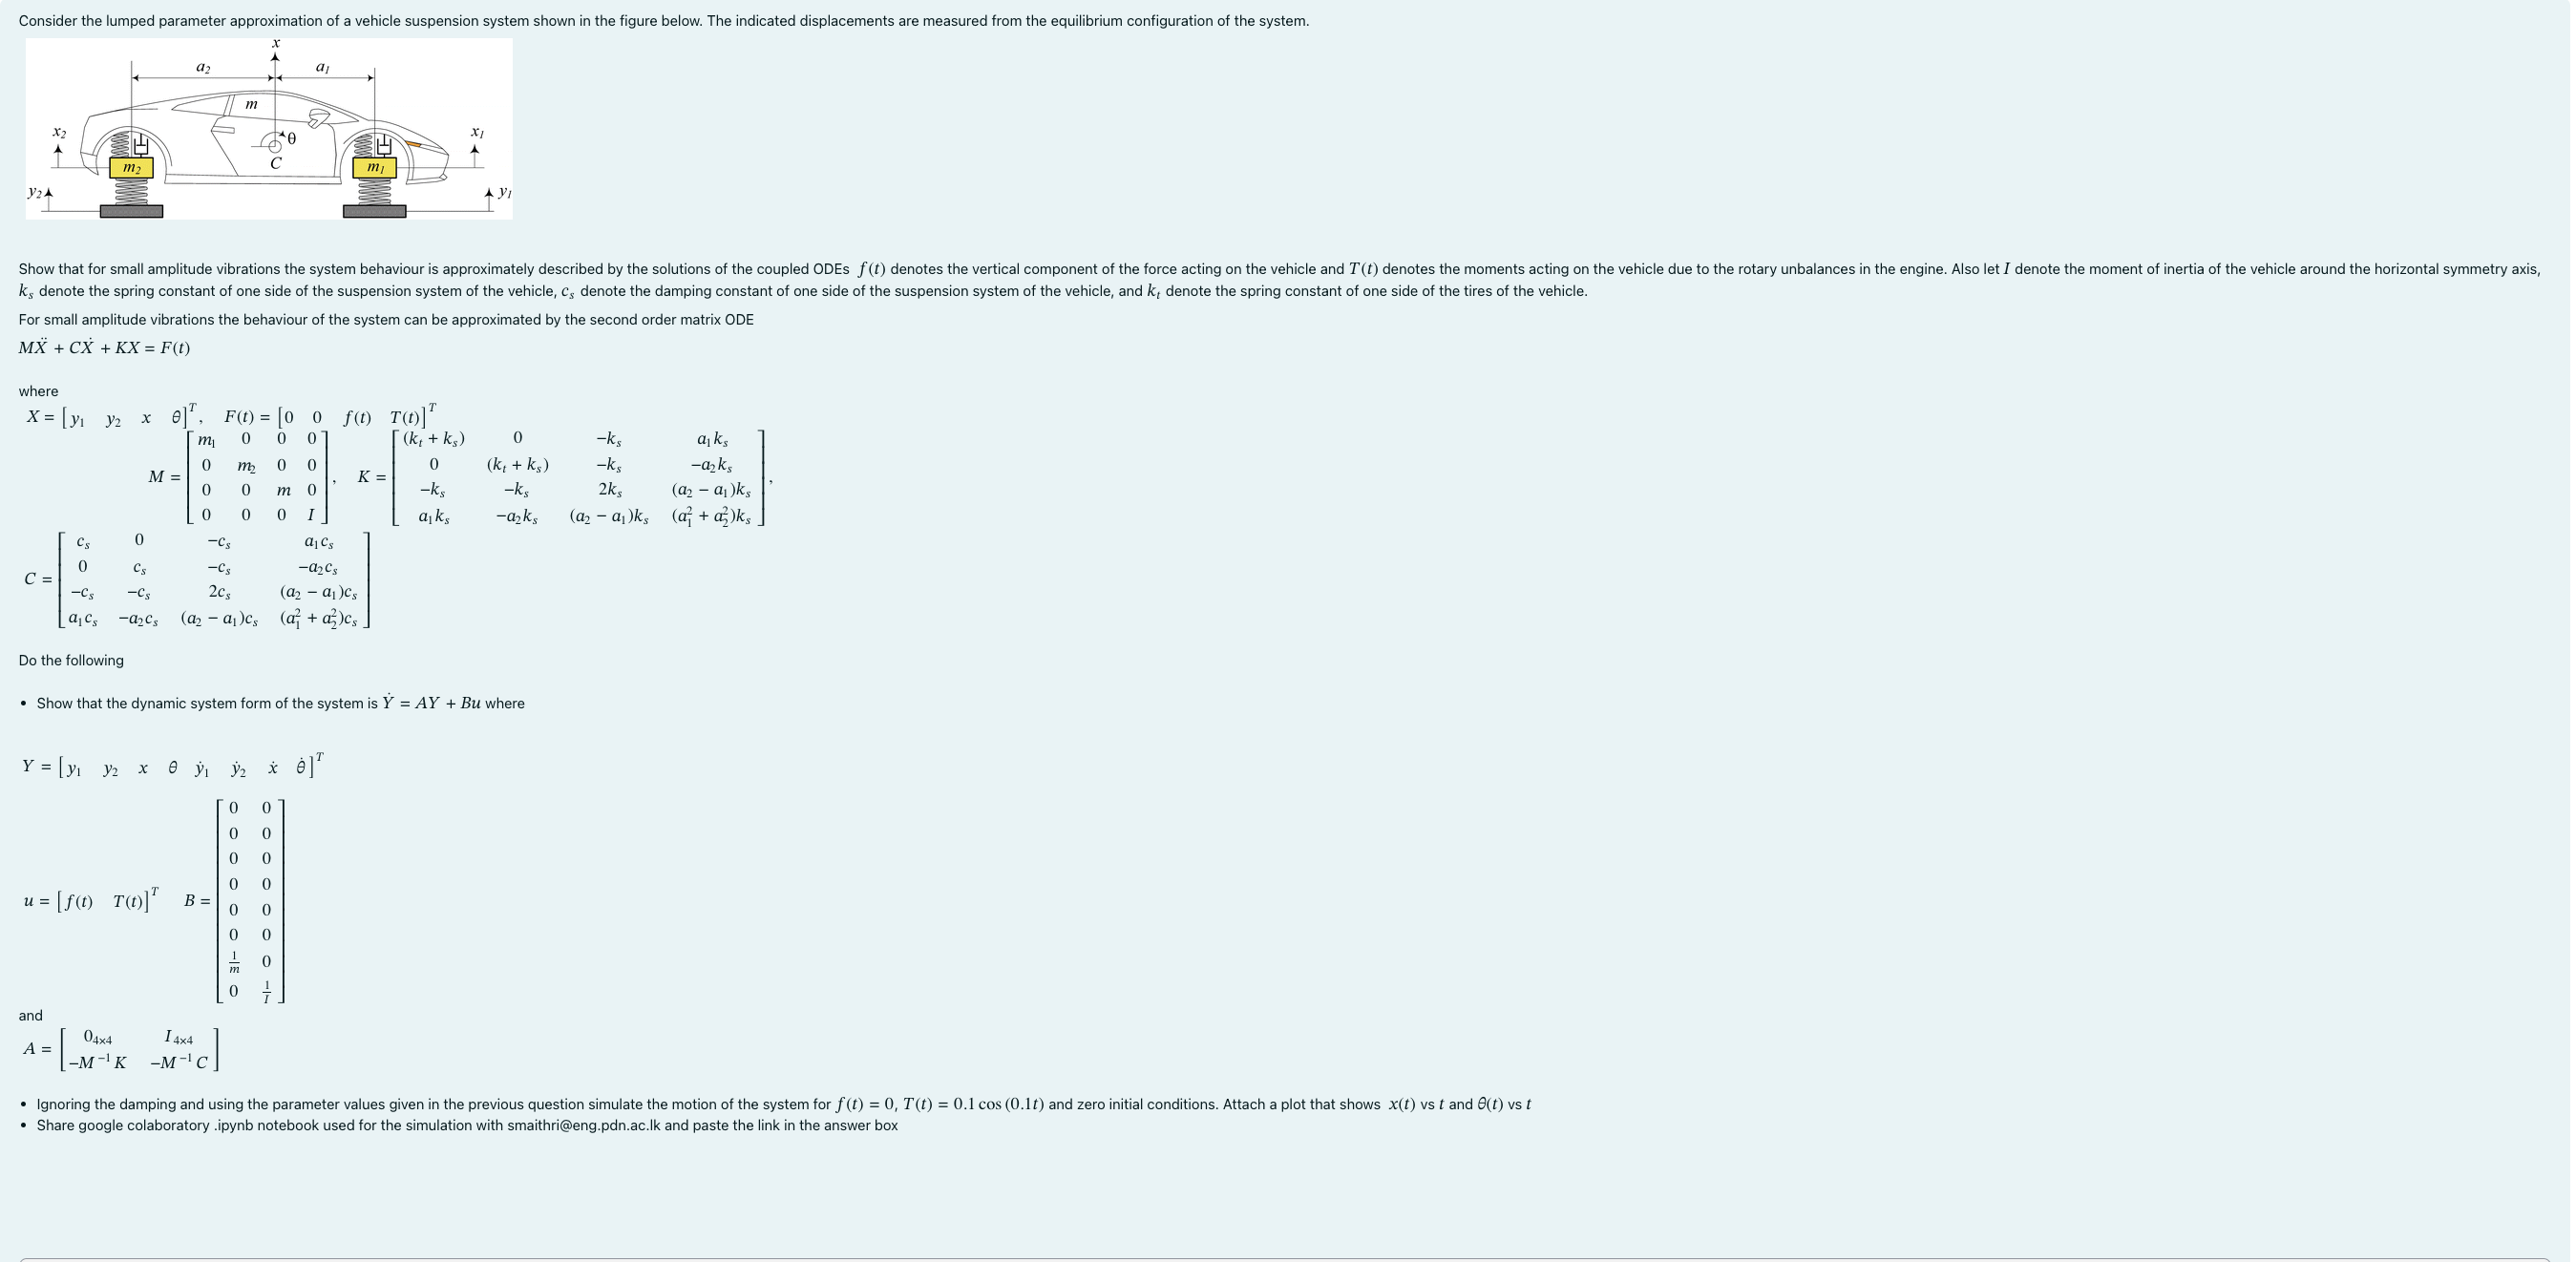

###Dynamic System form of the system - 2.5 marks

Let 
\begin{align}
Y=\begin{bmatrix} y_1 & y_2 & x & \theta & \dot{y}_1 & \dot{y}_2 & \dot{x} & \dot{\theta}
\end{bmatrix}^T
\end{align}

The dynamic system for of the system is then

\begin{align}
\dot{Y}&=AY+Bu
\end{align}
where
\begin{align}
u=\begin{bmatrix} f(t) & T(t)
\end{bmatrix}^T\:\:\:\:\: 
B=\begin{bmatrix} 0 &0 \\ 0 &0 \\0 &0 \\0 &0 \\0 &0 \\0 &0 \\\frac{1}{m} & 0\\0 &\frac{1}{I}
\end{bmatrix}
\end{align}
and 
\begin{align}
A=\begin{bmatrix} 0_{4\times 4} & I_{4\times 4}\\
-M^{-1}K & -M^{-1}C
\end{bmatrix}
\end{align}

For neglibigble damping $C=0_{4\times 4}$

### Simulation - 10 marks

In [ ]:
A=Matrix(zeros(8,8))
A[0:4,4:8]=Matrix(eye(4,4))
A[4:8,0:4]=-M.inv()@K
A[4:8,4:8]=-M.inv()@C

In [ ]:
B=Matrix(zeros(8,2))
B[6,0]=1/m
B[7,1]=1/I

In [ ]:
X0=np.zeros(8)
dd=mgVF.simulateDySystem(20, 0.01, X0, np.array(A.subs({m_1:m_0,m_2:m_0, a_1:a, a_2:a}).subs({m_0:7.5,a:3.9,k_s:4.9,k_t:2.9, c_s:0,m:1.6, I:2.7})).astype(float),np.array(B.subs({m_0:1,a:1,k_s:1,k_t:1, c_s:1,m:1, I:1})).astype(float), [np.array([1,1]),0.1], 'xLabel', 'yLabel')

#Section-B -- 50% of the total marks - 100% allocated to ILO3

##Q1 - Angular Velocity - 2.5/50 marks

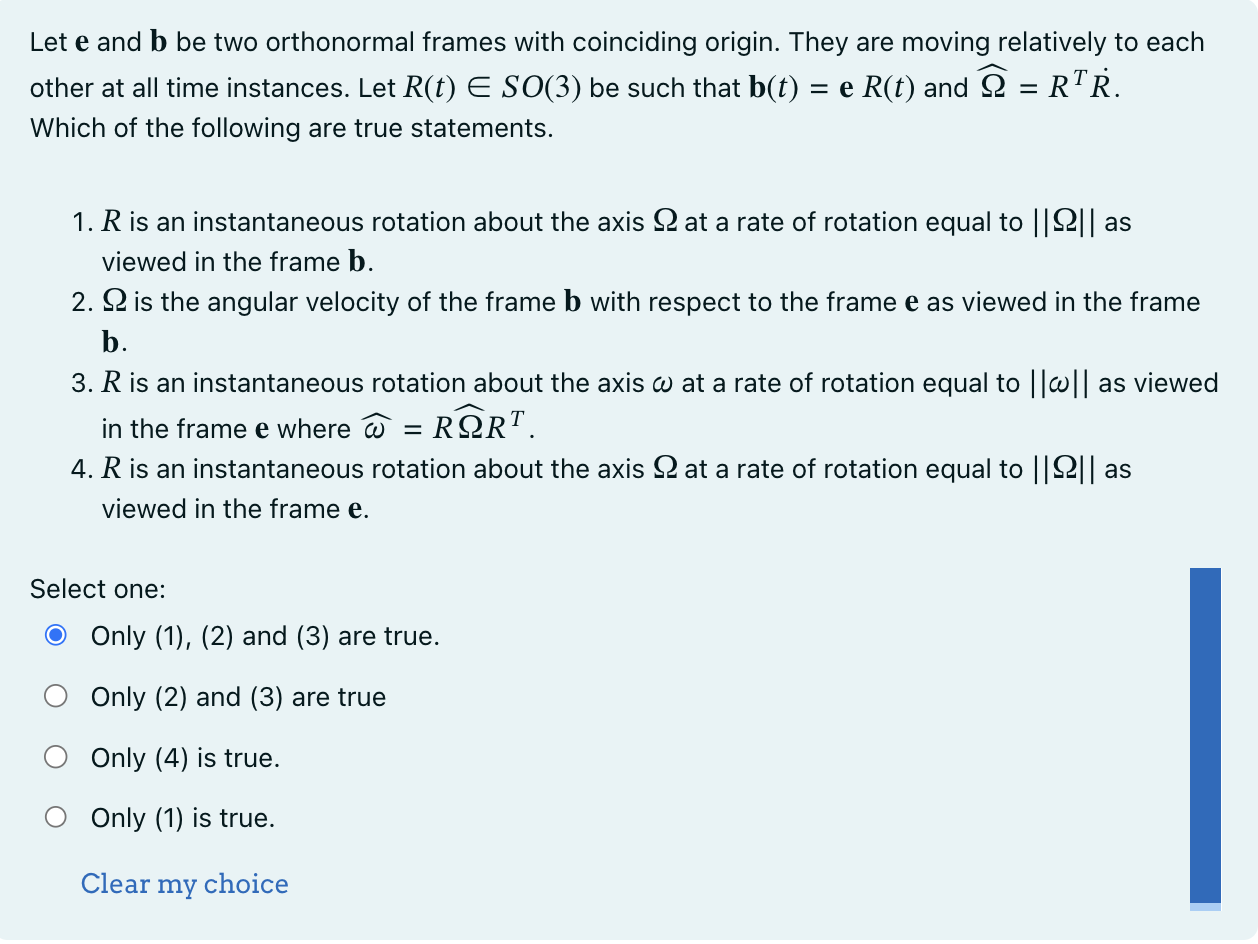

##Q2 - Angular momentum - 2.5/50 marks

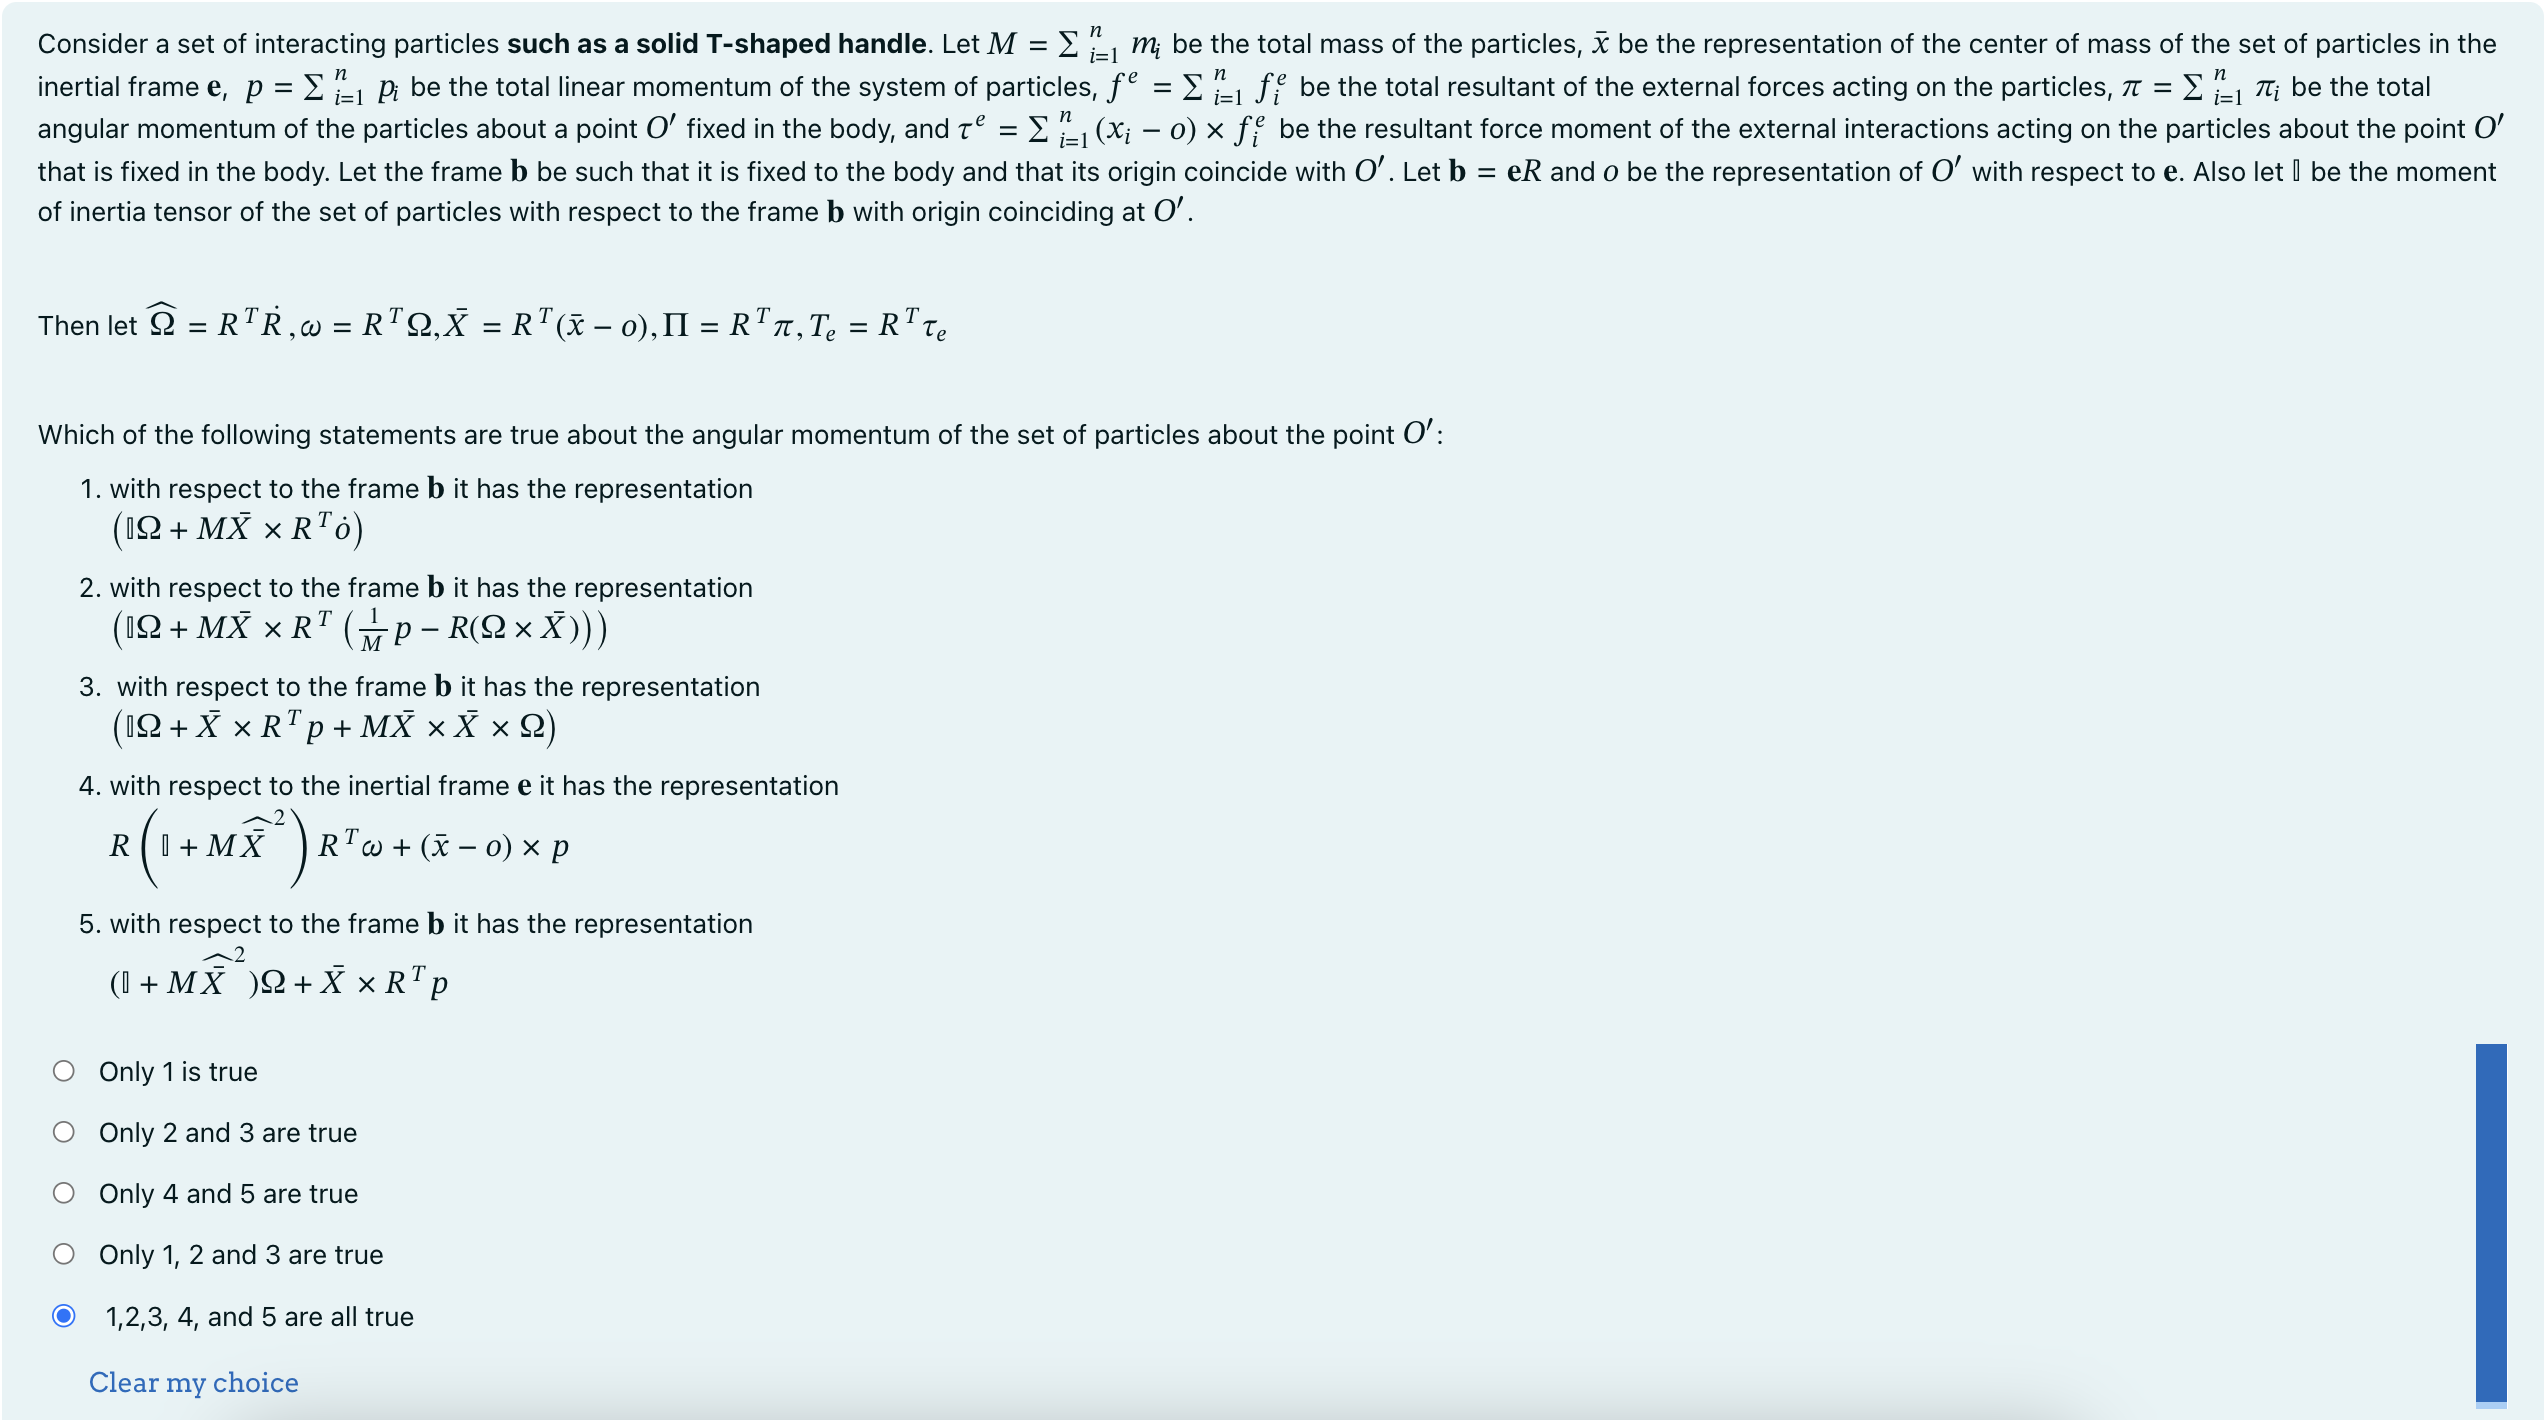

##Q3 -- equations of motion for a set of interacting particles - 2.5/50 marks

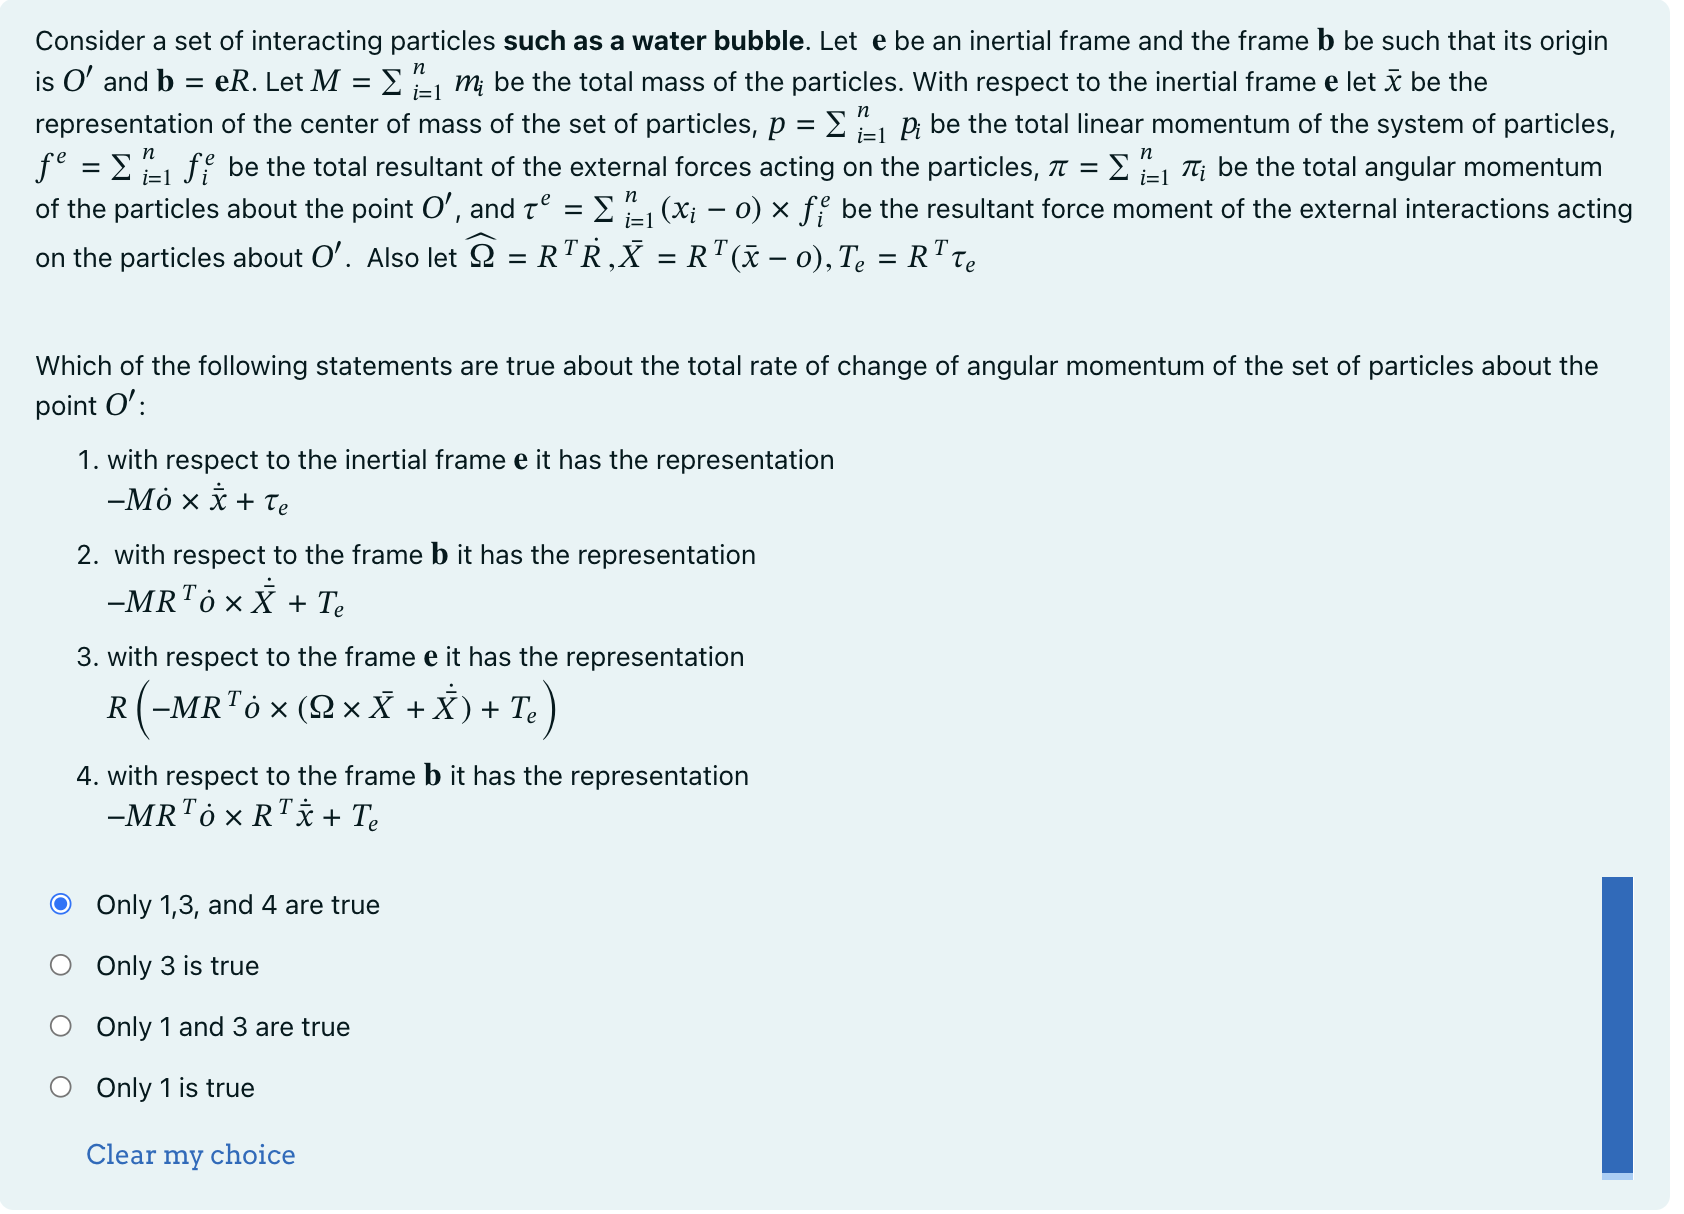

##Q4 -- Deriving rigidbody equations in body frames- 2.5/50 marks

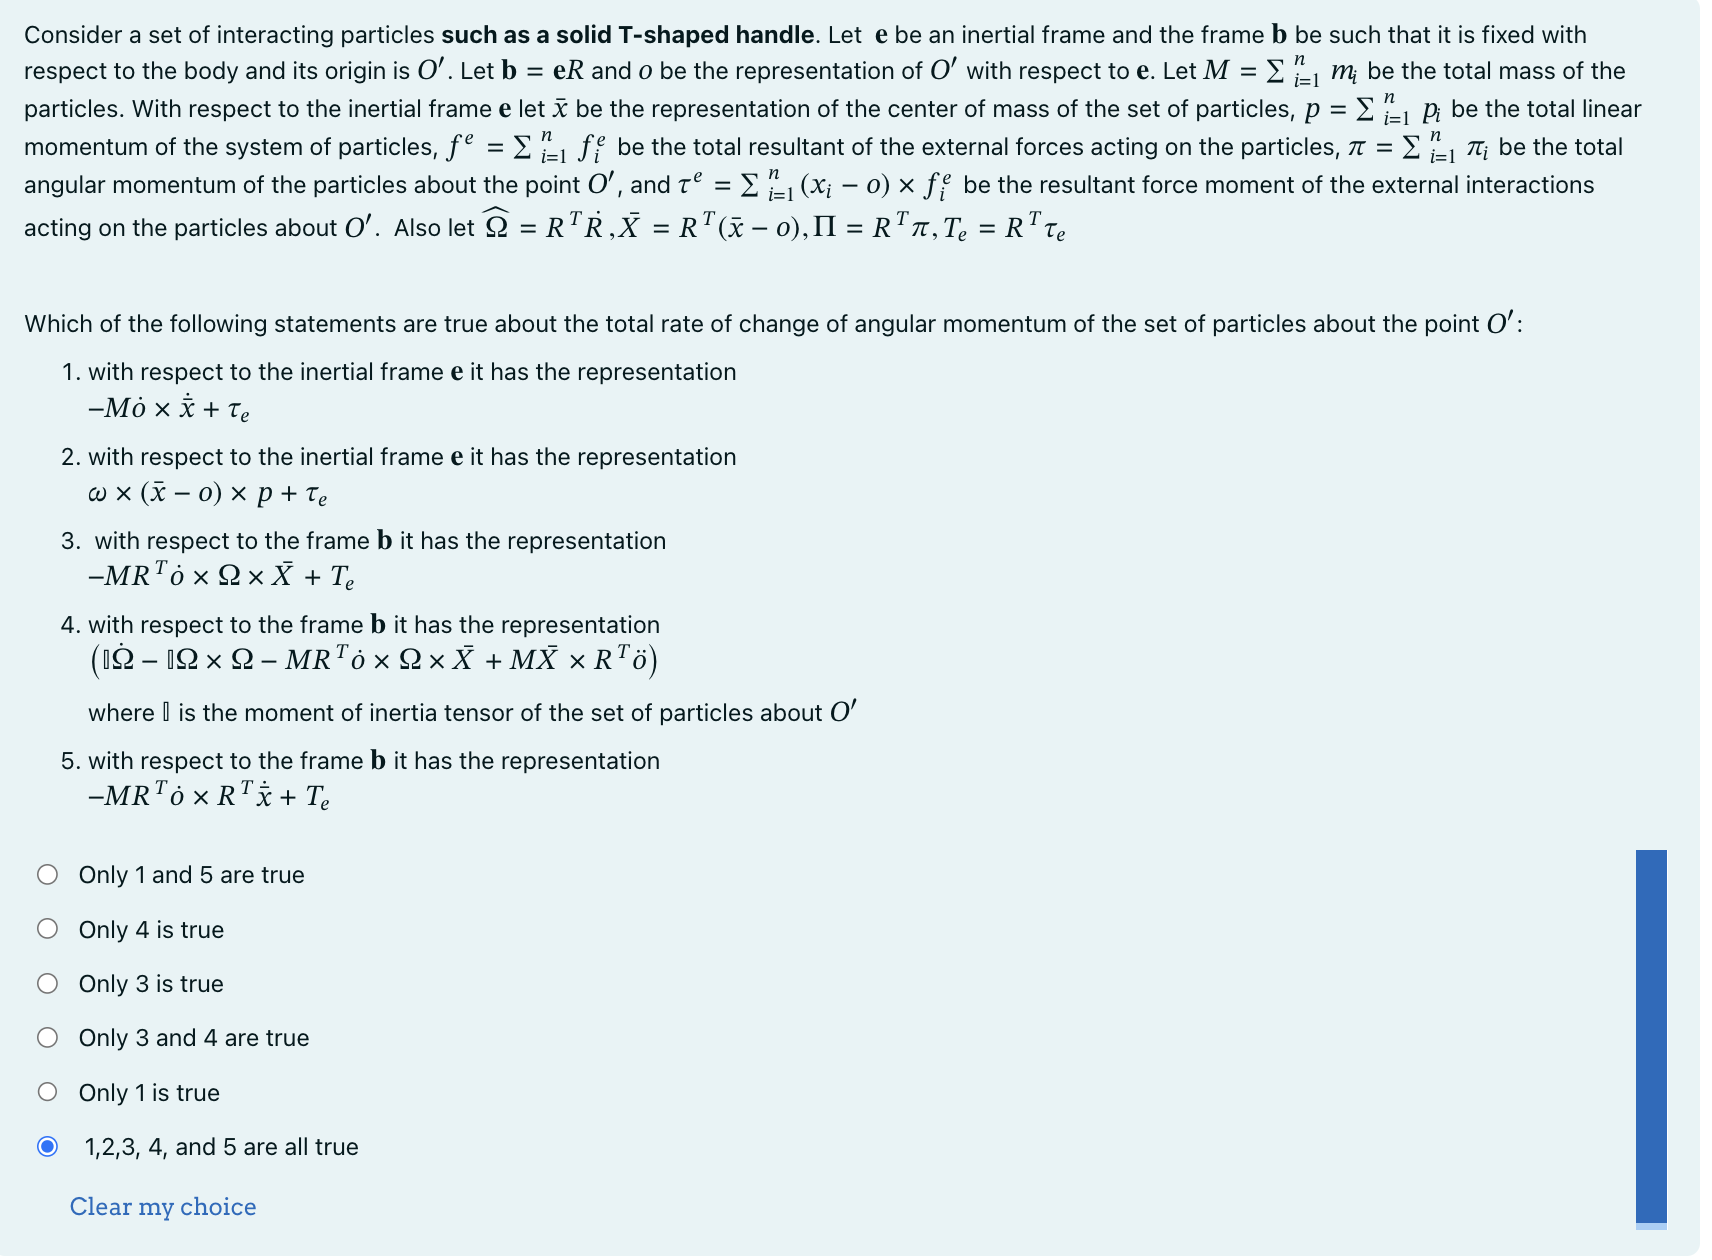

##Q5, Q6 - Inertia Tensor - 15/50 marks

Consider a rigid body that can be approximated as an object with three masses concentrated at three points $X_1,X_2,X_3$ with respect to some frame $\mathbf{b}$ with respect to which the three points appear fixed. Each of the three masses are of magnitude $m$. Find the following:

* The center of mass of the object with respect to the $\mathbf{b}$ frame.
* The moment of inertia of the object with respect to the $\mathbf{b}$ frame.

The center of mass:
\begin{align}
\bar{X}=\frac{\sum_{i=1}^3mX_i}{3m}
\end{align}

####Q5 - 5 marks

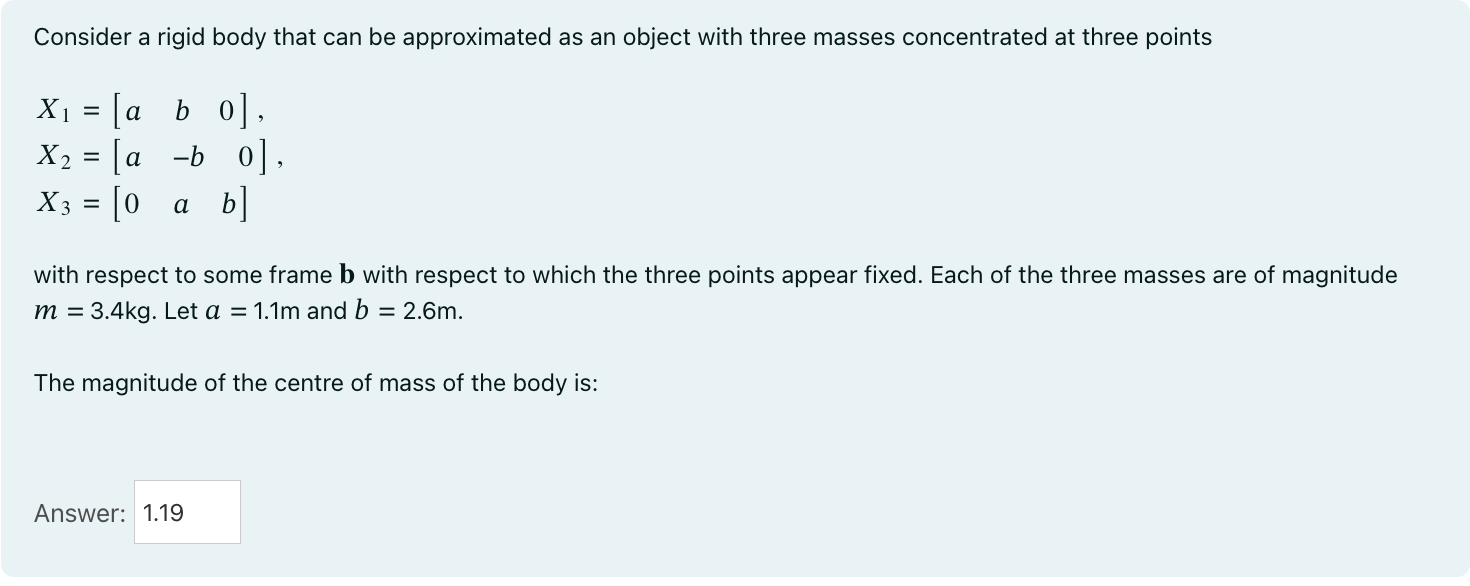

In [ ]:
a,b,m=symbols('a,b,m',real=True)

In [ ]:
init_vprinting(pretty_print=False)

In [ ]:
X1=Matrix([a,b,0]);X2=Matrix([a,-b,0]);X3=Matrix([0,a,b]);

In [ ]:
barX=(X1+X2+X3)/3

In [ ]:
mag=sqrt(barX[0]**2+barX[1]**2+barX[2]**2)

In [ ]:
mag

The moment of inertia:
\begin{align}
\mathbb{I}=-\sum_{i=1}^3m\widehat{X}_i^2
\end{align}

#### Q6 - 10 marks

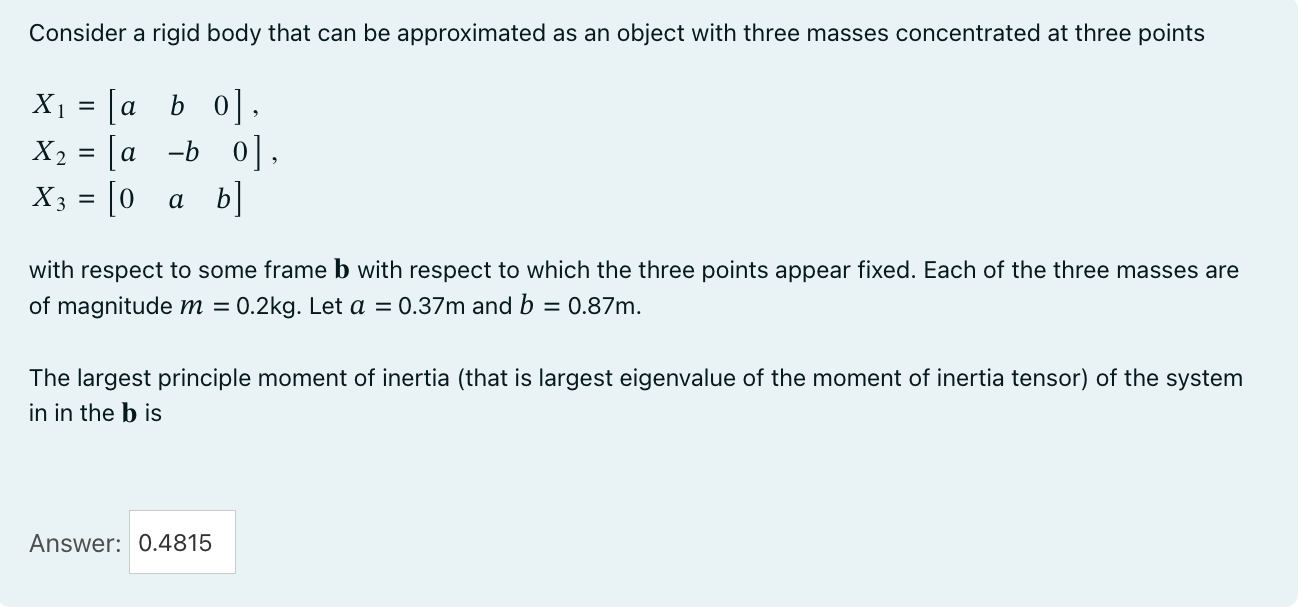

In [ ]:
hatX1=Matrix([[0,-X1[2],X1[1]],[X1[2],0,-X1[0]],[-X1[1],X1[0],0]])
hatX2=Matrix([[0,-X2[2],X2[1]],[X1[2],0,-X2[0]],[-X2[1],X2[0],0]])
hatX3=Matrix([[0,-X3[2],X3[1]],[X3[2],0,-X3[0]],[-X3[1],X3[0],0]])

In [ ]:
II=simplify(-m*(hatX1**2+hatX2**2+hatX3**2))

In [ ]:
[*II.eigenvals()]

In [ ]:
max({m}*({a}**2 + 3*{b}**2), {m}*(5*{a}**2 + 3*{b}**2)/2 - {m}*sqrt({a}**4 + 6*{a}**2*{b}**2 + {b}**4)/2, {m}*(5*{a}**2 + 3*{b}**2)/2 + {m}*sqrt({a}**4 + 6*{a}**2*{b}**2 + {b}**4)/2)

## Q7 and Q8 - 25/50 marks

Consider a bead of mass $m$ constrained to move as shown in the figure below. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{c}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis) and about an axis through its centre that is perpendicular to the disk (that is about the $\mathbf{c}_1$ axis). 

Let the radius of the disk be denoted by $r$, the thickness by $h$, the length of the slot by $2l$, the width of the slot by $2b$, and the density of the material by $\rho$.

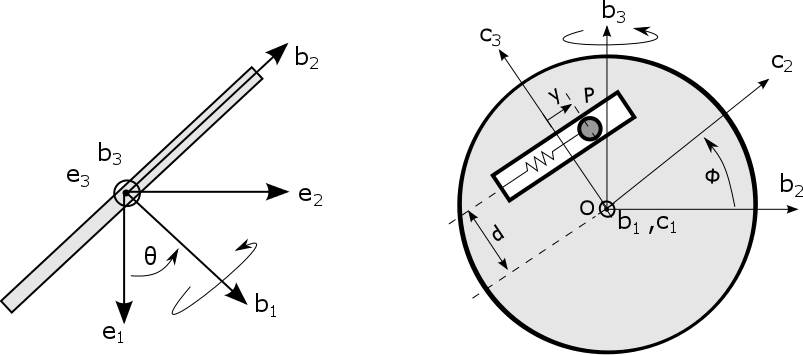

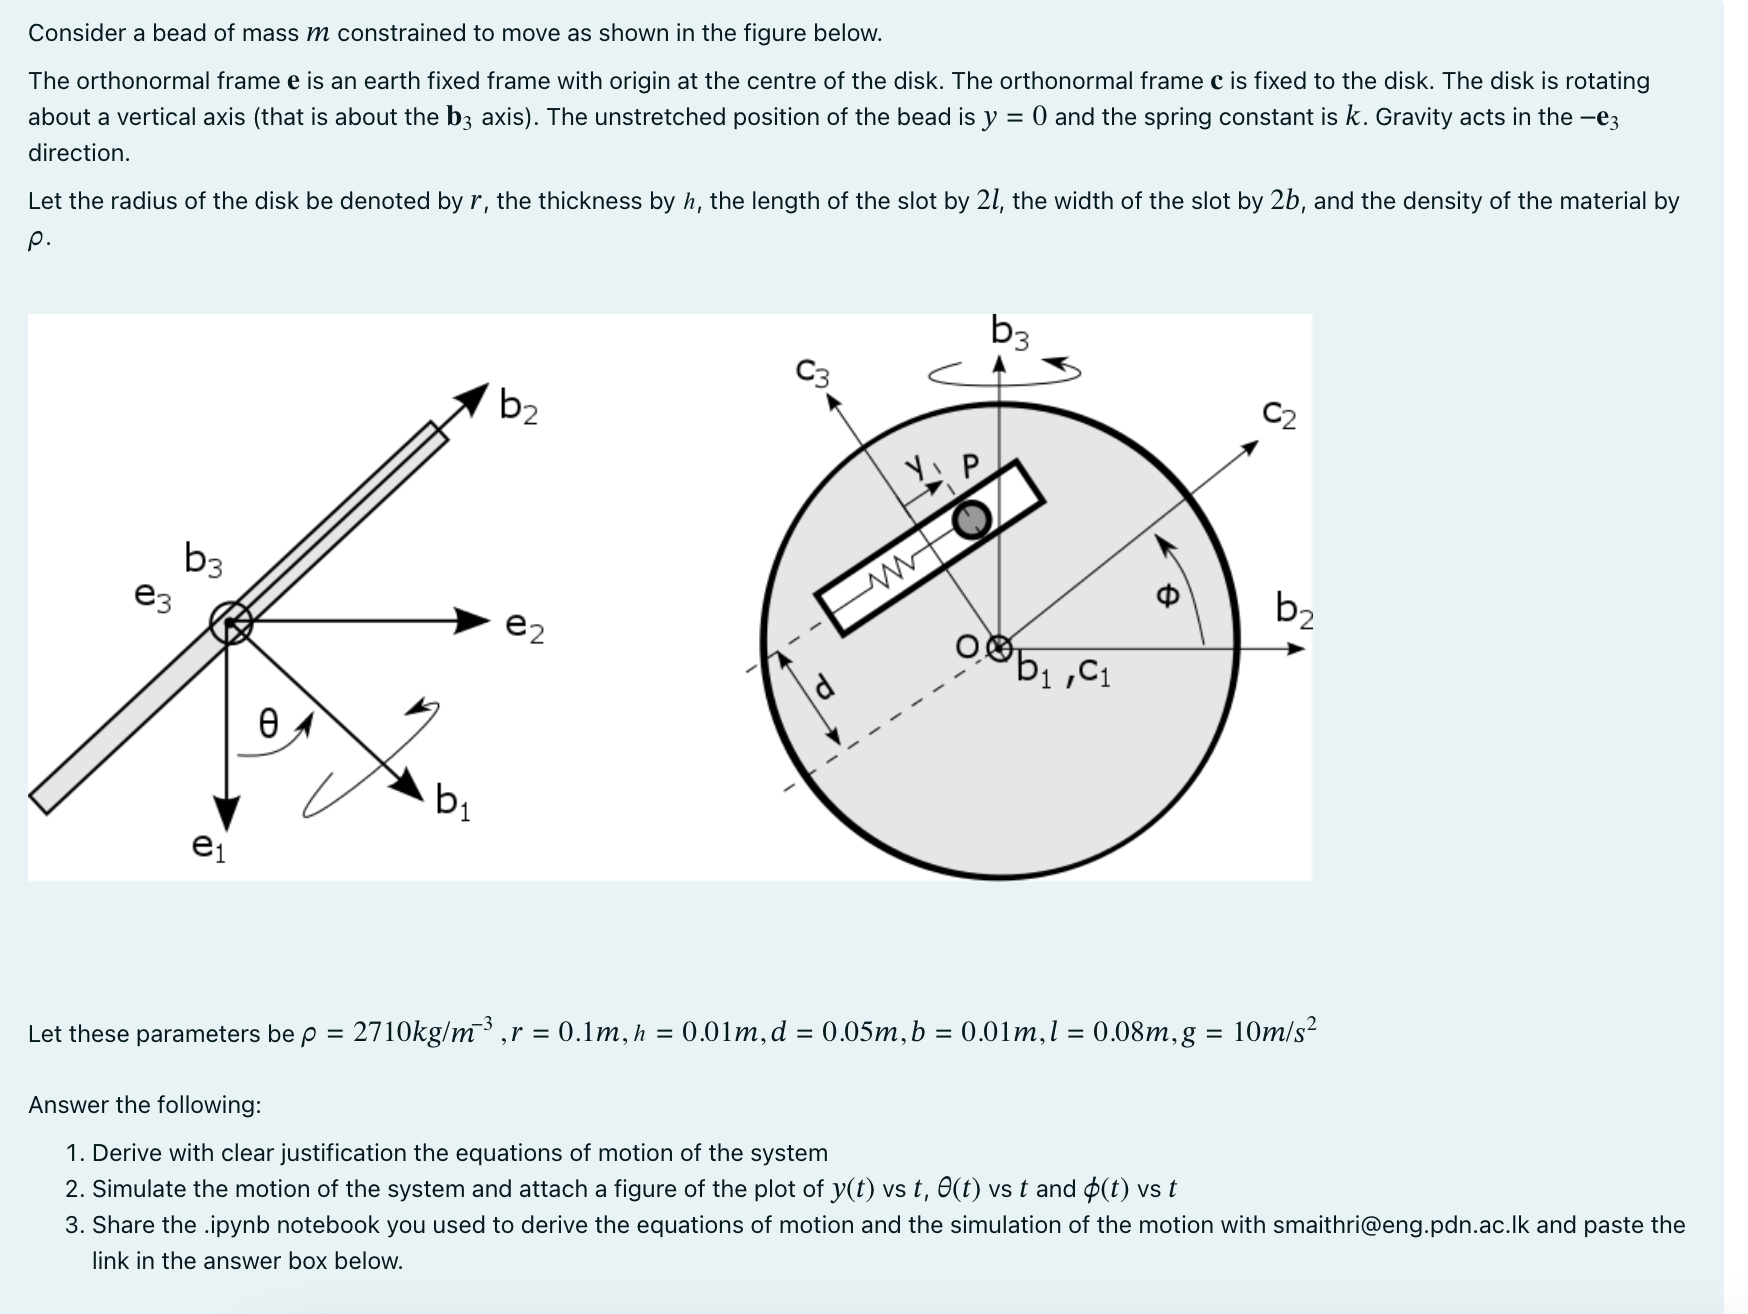

### Finidng the inertia properties of the system

In [ ]:
def inertia_slotted_disk():
  m, M, r, h, l, b, d, rho=symbols('m, M, r, h, l, b, d, rho')
  hatd=np.array([[0,-d,0],[d,0,0],[0,0,0]]);
  M_1=rho*np.pi*r**2*h;
  M_2=4*rho*l*b*h
  M=M_1-M_2;
  barX=-(M_2/M)*Matrix([0,0,-d]);
  hatXbar=-(M_2/M)*Matrix([[0,-d,0],[d,0,0],[0,0,0]]);
  Ic1=Matrix([[M_1*r**2/2,0,0],[0,M_1*(3*r**2+h**2)/12,0],[0,0,M_1*(3*r**2+h**2)/12]])
  Ic2=Matrix([[M_2*(4*b**2+4*l**2)/12,0,0],[0,M_2*(4*b**2+h**2)/12,0],[0,0,M_2*(h**2+4*l**2)/12]])
  II=Ic1-Ic2+M_2*hatd@hatd*2;
  IIc=II+M*hatXbar@hatXbar;
  return [M,barX,II,IIc]

In [ ]:
[M,barX,II,IIc]=inertia_slotted_disk()

In [ ]:
parameters={'rho':2710, 'r':0.1, 'h':0.01, 'd':0.05, 'b':0.01, 'l':0.08, 'g':10}

### equations of motion for the bead plus disk coupled system

#### Configuration and Angular Velocity

\begin{align}
\mathbf{b}&=\mathbf{e}\underbrace{\begin{bmatrix} \cos{\theta} &-\sin{\theta} &0\\
\sin{\theta} & \cos{\theta} & 0\\
0 & 0 & 1
\end{bmatrix}}_{R_3(\theta)}\\
\mathbf{c}&=\mathbf{b}\underbrace{\begin{bmatrix} 1 & 0 & 0\\0 & \cos{\phi} &-\sin{\phi}\\
0 & \sin{\phi} & \cos{\phi}
\end{bmatrix}}_{R_1(\phi)}
\end{align}
Thus 
\begin{align}
\mathbf{c}&=\mathbf{b}R_1=\mathbf{e}\underbrace{R_3R_1}_{R}
\end{align}

Thus the angular velcoty is given by
\begin{align}
\widehat{\Omega}&=R^T\dot{R}=\widehat{\Omega}_1+R_1^T\widehat{\Omega}_3R_1
\end{align}
and hence
\begin{align}
{\Omega}&={\Omega}_1+R_1^T{\Omega}_3=\begin{bmatrix}\dot{\phi} \\ \dot{\theta}\sin{\phi} \\ \dot{\theta}\cos{\phi}
\end{bmatrix}
\end{align}

We consider the system as a coupled system. The bead and the disk. Below we will write down the Newton's equations for the two systems seperately.


#### Newton's Equations of Motion for the Bead

Let the position of the center of mass of the bead be denoted by
\begin{align}
OP=\mathbf{e}\bar{x}_p=\mathbf{c}\underbrace{\begin{bmatrix} 0\\ y\\d
\end{bmatrix}}_{\bar{X}_p}=\mathbf{e}\,{R_3(\theta)R_1(\phi)}\,\bar{X}_p.
\end{align}

Assuming that the bead is a small spherical object of total mass $m$ we see that its center of mass motion is described in the $\mathbf{b}$ frame by the equations
\begin{align}
m\,R\left(\widehat{\Omega}^2\bar{X}_p +\widehat{\Omega}\dot{\bar{X}}_p+\dot{\widehat{\Omega}}\bar{X}_p+\ddot{\bar{X}}_p\right)&=  R F^e_p
\end{align}
Where $F^e$ is the representation of the external forces acting on the bead expressed in the moving $\mathbf{b}$ frame that is explicitly given by
\begin{align}
\mathbf{c}F^e_p=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{b}\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}
\end{align}

#### Equations of motion for the disk

We see that in a moving frame $\mathbf{b}$ with the origin fixed with respect to the inertial frame $\mathbf{e}$  
\begin{align}
p&=M\dot{\bar{x}}_D=MR(\Omega\times \bar{X}_D),\\
\pi &=R\mathbb{I}_D\Omega,
\end{align}
where $\bar{X}_D$ is the representation of the center of mass of the disk in the  moving frame $\mathbf{b}$ and $\mathbb{I}_D$ is the moment of inertia tensor of the disk with respect to the disk fixed frame $\mathbf{b}$.

\begin{align}
p&=M_D\,R\widehat{\Omega}\bar{X}=M_D\dot{\bar{x}},\\
\pi&= R\mathbb{I}\Omega
\end{align}
and their derivatives are
\begin{align}
\dot{p}&=M_D\,R\left(\widehat{\Omega}^2\bar{X}_D +\dot{\widehat{\Omega}}\bar{X}\right)=  R F^e_D=f^e_D,\\
\dot{\pi}&=R\left(\mathbb{I}_D\dot{\Omega}-\mathbb{I}_D{\Omega}\times \Omega\right)=RT^e_D=\tau^e_D.
\end{align}
We see that the resultant of the external forces acting on the disk are given by

\begin{align}
\mathbf{c}F^e_D=\mathbf{c}\underbrace{\begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}}_{F_{b_1}}+\mathbf{c}\underbrace{\begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}}_{F_{b_2}}+\mathbf{c}\underbrace{\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}}_{F_{b_3}}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}}_{f_g}
\end{align}
and the reultant moments about the pivot point are given by
\begin{align}
T^e_D&=\begin{bmatrix} 0\\ y\\d
\end{bmatrix}\times \begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}+\begin{bmatrix} 0\\ 0\\0
\end{bmatrix}\times \begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}+\begin{bmatrix} 0\\ -l\\d
\end{bmatrix}\times\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}+
\bar{X}_D\times R_1^T(\phi)\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}+\begin{bmatrix} 0\\ T_2\\T_3
\end{bmatrix}
\end{align}

#### Rotational Constraint

From the configuration of the system we also see that the external moments about the disk around the $\mathbf{e}_3=\mathbf{b}_3$ axis is zero. Thus we also have the relationship:
\begin{align}
\begin{bmatrix}0\\0\\1\end{bmatrix}\cdot R_1(\phi)T^e_d=0
\end{align}

####Symbolic computations

##### Symobolic computation of the equations of motion for the bead

In [ ]:
y, theta, phi = dynamicsymbols('y, theta, phi')
d, l, m, k, g, t, N_1, N_3, omega= symbols('d, l, m, k, g, t, N_1, N_3, omega')
init_vprinting()
R1_phi = Matrix([[1, 0, 0],[0, cos(phi), -sin(phi)],[0, sin(phi),cos(phi)]])
R3_theta = Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])

In [ ]:
dy=y.diff('t');
ddy=dy.diff('t');
dtheta = theta.diff(t);
ddtheta=dtheta.diff('t');
dphi = phi.diff(t)
ddphi = dphi.diff(t)

In [ ]:
R=R3_theta@R1_phi;
Omega_3=Matrix([0,0,dtheta]);
Omega_1=Matrix([dphi,0,0]);
Omega=Omega_1+R1_phi.T@Omega_3;
hatOmega_3=Matrix([[0, -Omega_3[2], Omega_3[1]],[Omega_3[2],0,-Omega_3[0]],[-Omega_3[1],Omega_3[0],0]])
hatOmega_1=Matrix([[0, -Omega_1[2], Omega_1[1]],[Omega_1[2],0,-Omega_1[0]],[-Omega_1[1],Omega_1[0],0]])
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]])
dOmega_3=Matrix([0,0,ddtheta]);
dOmega_1=Matrix([ddphi,0,0]);
dOmega=dOmega_1+R1_phi.T@dOmega_3-hatOmega_1@R1_phi.T@Omega_3;
hatdOmega_3=Matrix([[0, -dOmega_3[2], dOmega_3[1]],[dOmega_3[2],0,-dOmega_3[0]],[-dOmega_3[1],dOmega_3[0],0]])
hatdOmega_1=Matrix([[0, -dOmega_1[2], dOmega_1[1]],[dOmega_1[2],0,-dOmega_1[0]],[-dOmega_1[1],dOmega_1[0],0]])
hatdOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
barX_p=Matrix([0,y,d]);
dbarX_p=Matrix([0,dy,0]);
ddbarX_p=Matrix([0,ddy,0]);
hatbarX_p=Matrix([[0, -barX_p[2], barX_p[1]],[barX_p[2],0,-barX_p[0]],[-barX_p[1],barX_p[0],0]]);
hatdbarX_p=Matrix([[0, -dbarX_p[2], dbarX_p[1]],[dbarX_p[2],0,-dbarX_p[0]],[-dbarX_p[1],dbarX_p[0],0]]);
hatddbarX_p=Matrix([[0, -ddbarX_p[2], ddbarX_p[1]],[ddbarX_p[2],0,-ddbarX_p[0]],[-ddbarX_p[1],ddbarX_p[0],0]]);
f_pg=Matrix([0,0,-m*g]);
F_p=Matrix([N_1,-k*y,N_3])+R1_phi.T@ f_pg;

In [ ]:
((hatbarX_p @ hatbarX_p)@Omega).norm()

In [ ]:
beadEqn=simplify(m*(hatOmega@hatOmega@barX_p +2*hatOmega@dbarX_p+hatdOmega@barX_p+ddbarX_p)- F_p)

In [ ]:
beadEqn

In [ ]:
eqddy_ddphi=beadEqn[1];

In [ ]:
eqN3=beadEqn[2]+N_3;

In [ ]:
eqN1=beadEqn[0]+N_1;

##### Symbolic computation of equations of motion for the disk

In [ ]:
M, II_1, II_2, II_3, T_2, T_3=symbols('M, II_1, II_2, II_3, T_2, T_3');
II=Matrix([[II_1,0,0],[0,II_2,0],[0,0,II_3]]);
f_Dg=Matrix([0,0,-M*g])
F_p=Matrix([N_1,-k*y,N_3])+R1_phi.T@ f_pg;
F_D1=Matrix([-N_1,0,-N_3]);
F_D2=Matrix([0,k*y,0]);
X2=Matrix([0,-l,d]);
hatbarX=Matrix([[0, -barX[2], barX[1]],[barX[2],0,-barX[0]],[-barX[1],barX[0],0]]);
hatX2=Matrix([[0, -X2[2], X2[1]],[X2[2],0,-X2[0]],[-X2[1],X2[0],0]]);
Tc=Matrix([0,T_2,T_3]);
T_D=simplify(hatbarX_p @ F_D1+hatX2 @ F_D2+hatbarX@R1_phi.T@f_Dg+Tc);

In [ ]:
diskEqn=simplify((II@dOmega+hatOmega@II@Omega))-T_D

In [ ]:
diskEqn

#### Condition that the external moments about the $\mathbf{b}_3$ axis is zero

In [ ]:
simplify(R1_phi@T_D)[2]

In [ ]:
eqddtheta=simplify(diskEqn[1]*sin(phi)+diskEqn[2]*cos(phi)+simplify(R1_phi@T_D)[2])

In [ ]:
eqddtheta

In [ ]:
print(eqddtheta)

In [ ]:
eqddphi=diskEqn[0].subs({'N_3':eqN3})

In [ ]:
eqddy_ddphi

#### Simulations

In [ ]:
def beadInDiskSystemModelV2(X, t, parameters):
  y=X[0]; dy=X[1]; phi=X[2]; dphi=X[3]; theta=X[4]; dtheta=X[5]
  [M,barX,I,Ic]=inertia_slotted_disk();
  II=I.subs(parameters);
  II_1=II[0,0]; II_2=II[1,1]; II_3=II[2,2];
  ddphi=(-g*(M*l*d*np.sin(phi)+m*y*np.cos(phi))-k*d*y+0.5*(II_2-II_3)*np.sin(2*phi)*dtheta**2+m*d*y*((np.sin(phi))**2*dtheta**2+dphi**2)-0.5*m*y**2*np.sin(2*phi)*dtheta**2-2*m*y*dphi*dy)/(II_1+m*y**2);
  ddtheta=(II_3-II_2)*np.sin(2*phi)*dphi*dtheta/(II_2*(np.sin(phi))**2+II_3*(np.cos(phi))**2);
  ddy=-m*g*np.sin(phi)-k*y+m*y*((np.sin(phi))**2*dtheta**2+dphi**2)-0.5*m*d*np.sin(2*phi)*dtheta**2+m*ddphi;

  dXdt=[dy, ddy.subs(parameters), dphi, ddphi.subs(parameters), dtheta, ddtheta.subs(parameters)];
  return dXdt

In [ ]:
mgDS

In [ ]:
parameters={'rho':2710, 'r':0.1, 'h':0.01, 'd':0.05, 'b':0.005, 'l':0.04, 'g':10, 'k':4, 'm':0.01}
[t,sol,fig]=mgDS.simulateDySystem(beadInDiskSystemModelV2, 10,0.02, [1.5,0,0,0.2,0,0.2], parameters, 'y(t) and \dot{y}(t) Vs t', 'Time / t', 'x')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]; phi=sol[i][2]; theta=sol[i][4];
  R3=np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
  R1=np.array([[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),-np.cos(phi)]])
  R=R3 @ R1;
  XX[i,:]=R @ [0,y,parameters['d']];

In [ ]:
fig=mgDS.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion in the e-frame')